<p align="center">
  
  <h2 align="center">Data Analysis Skill Test</h2>
  <h3 align="center">4intelligence</h3>
  
</p>

<br> 


# Case 1


> * Open the TFP.csv file attached.
> * The series is composed by TFP (rtfpna variable) at constant national prices (2005 = 1) for three countries: United States (USA), Canada (CAN) and Mexico (MEX).

> 1.  Make an exploratory data analysis;
> 2.  Forecast 10 years of the series (if you are performing the exercise in R, use package “forecast”);
> 3.  Check in the following link pages 2 and 3: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf to see a list of all variables in the original dataset. Can you think about another feature that could be helpful in explaining TFP series? Explain.


# Case 2

> * Attached to this test is a .csv file which contains data from Comexstat, which is basically the official data source for brazilian exports e imports, maintened by the government;
> * The dataset contains all trackings of monthly imports and exports of a range of products (soybeans, soybean meal, soybean oil, corn, wheat and sugar), by brazilian states, by routes (air, sea, ground, etc) e from/to which country;
> * We ask you to address a couple quentions below. Remember that data viz is one important skill to show besides any analytical skill. So we encourage you to use and explore a bunch of graphs and tables to show your point.

> 1. Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’;
> 2. What are the 3 most important products exported by Brazil in the last 5 years?
> 3. What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?
> 4. Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?
> 5. For each of the products in the dataset, show the 5 most important states in terms of exports?
> 6. Now, we ask you to show your modelling skills. Feel free to use any type of modelling approach, but bear in mind that the modelling approach depends on the nature of your data, and so different models yield different estimates and forecasts. To help you out in this task we also provide you with a dataset of possible covariates (.xlsx). They all come from public sources (IMF, World Bank) and are presented in index number format. Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.


# Import libraries 

In [1]:
# Basic

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import warnings
import statsmodels.api as sm
from scipy import stats


# Specific

from collections import Counter


%matplotlib inline
random.seed(0)
warnings.filterwarnings('ignore')

# Case 1 

## Import data

In [2]:
try: 
    df_tfp = pd.read_csv('TFP.csv')
    print('File loading - Success!')
except:
    print('File loading - Failed!')

File loading - Success!


## Item 1 - Case 1

> * Make an exploratory data analysis.

## Exploratory Data Analysis and Data Preprocessing

>  * Here, the TFP series from Canada, Mexico and USA will be studied, observing all the necessary points for modeling. Additionally, manipulations of the data will be made to make it ideal for modeling.

> step-by-step:
>    1. Basic information;
>    2. Reshape data;
>    3. Data visualization;
>    4. Autocorrelation analysis;
>    5. Cointegration test;
>    6. Split data;
>    7. Unit root test;
>    8. First difference;

>  * As the data are annual, seasonal analysis is not necessary. 
>  * The structural break tests available in Python have some limitations, usually requiring you to know the break point in advance (like Chow test). As all modeling will be linear, I will not use the compatible tests available in R in this environment.


In [3]:
# Head data check

df_tfp.head()

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [4]:
# Info check

df_tfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 3 columns):
isocode    186 non-null object
year       186 non-null int64
rtfpna     186 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


Comments:
    

> * The data frame info indicates the absence of missing values, which is a recurring problem in data analysis.

### Reshape data


> * Since the data is stacked, a pivot table will be made in the data frame to arrange the data in a more compatible way with time series and with the input of the functions used later. In addition, the data is visually leaner, without repeating values in `iscode` e `years`.

In [5]:
# Pivot table

df_tfp = df_tfp.pivot(index='year', columns='isocode', values='rtfpna')

### Data visualization

> * Visualizations of the time series will be made to observe their disposition as a function of time (period from 1950 to 2010). With visualization, we can have the first indications of possible problems in the series.

In [6]:
# Configurando parametros dos plots, para melhor visualização 

sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
sns.mpl.rcParams['savefig.dpi'] = 90
sns.mpl.rcParams['font.family'] = 'serif'
sns.mpl.rcParams['font.size'] = 14

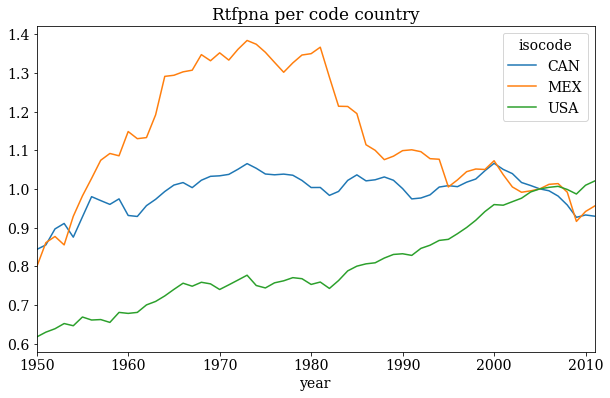

In [7]:
# basic plot: Rtfpna per code country

df_tfp.plot()

plt.title('Rtfpna per code country')
plt.show()

In [8]:
# Descriptive statistics

df_tfp.describe()

isocode,CAN,MEX,USA
count,62.000000,62.000000,62.000000
mean,0.992886,1.130132,0.803824
std,0.050126,0.158209,0.116121
min,0.843335,0.798159,0.617148
25%,0.973294,1.012231,0.739949
50%,1.004211,1.093859,0.766047
75%,1.029513,1.299591,0.880544
max,1.066104,1.383718,1.020392


Comments:

> * Based on the visualizations and descriptive statistics, there's an indicative that the series have different behaviors. For example, while the USA shows a positive trend, the other series do not.


### Autocorrelation analysis

> * Observing the autocorrelation function (ACF) and the partial autocorrelation function (PACF) is the first thing to be done in the identification if there is any indication that the series tested has an autoregressive and moving average process, respectively. 

> * 10 lags were used arbitrarily given the size of the time series.

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


#### `CAN`

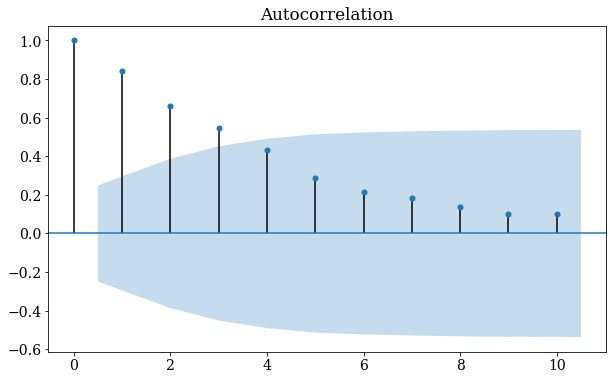

In [10]:
# Autocorrelation plot

plot_acf(df_tfp.CAN, lags=10)
plt.show()

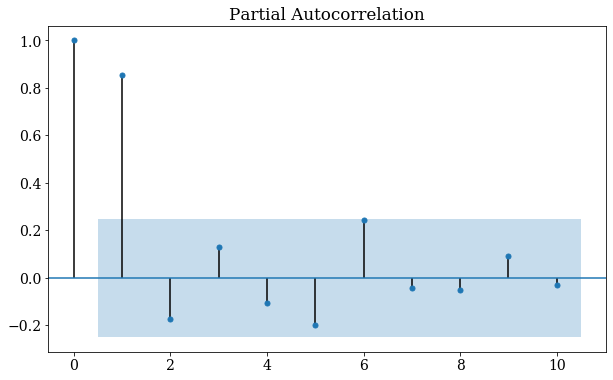

In [11]:
# Partial autocorrelation plot

plot_pacf(df_tfp.CAN, lags=10)
plt.show()

#### `MEX`

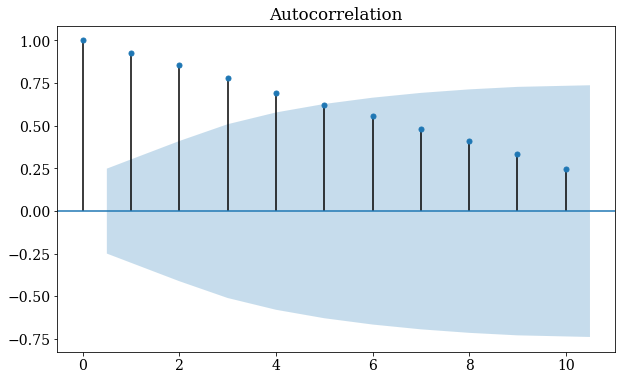

In [12]:
# Autocorrelation plot

plot_acf(df_tfp.MEX, lags=10)
plt.show()

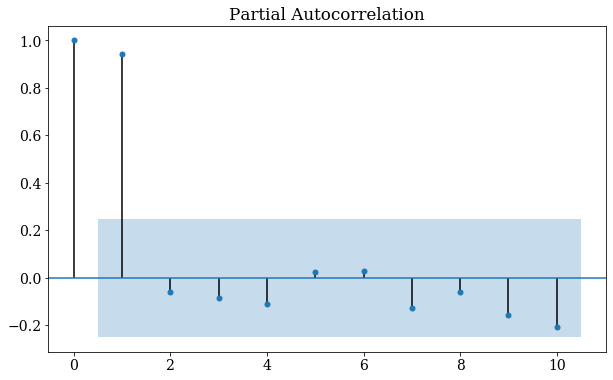

In [13]:
# Partial autocorrelation plot

plot_pacf(df_tfp.MEX, lags=10)
plt.show()

#### `USA`

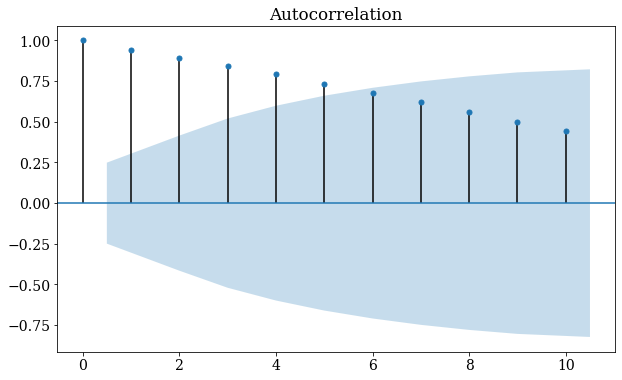

In [14]:
# Autocorrelation plot

plot_acf(df_tfp.USA, lags=10)
plt.show()

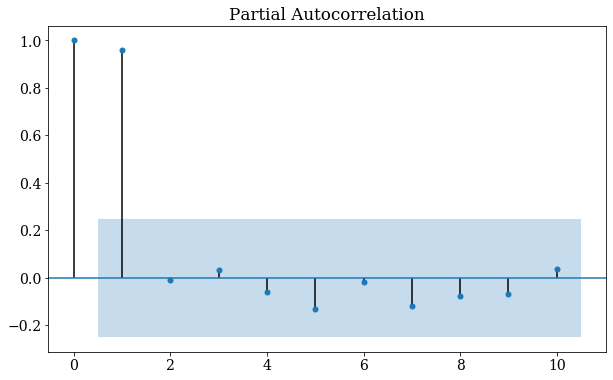

In [15]:
# Partial autocorrelation plot

plot_pacf(df_tfp.USA, lags=10)
plt.show()

Comments:


> * The visualizations of the ACF and PACF indicate that the series have an autoregressive and moving average process, since statistically significant lags can be observed.

> * Another useful information taken from these results is the maximum order to be tested later. the number of significant lags can be used as the maximum of `p` and `q` in univariate modeling.

### Cointegration test;

> * Cointegration test is used to identify whether there is a long-term relationship between series.

> * Two series, $y_t$ e $z_t$, may behave like a random walk, but a linear combination of them may not be a random walk ($y_t-cz_t$). If this happens, $y_t-cz_t4$ is predictable and the original series are said to be co-integrated, implying a similar stochastic trend. Thus, they move together in the long run, since the linear combination is reversible to average.

> * The used cointegration test is the Johansen's, where its null hypothesis is that the series are not cointegrated and the alternative hypothesis is the opposite case.

In [16]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [17]:
def cointegration_test(data, det_order=-1, k_ar_diff=5, alpha=0.05): 
    """
    Perform Johanson's Cointegration Test and Report Summary
    
    Função para realizar o teste de cointegração de johansen e recuperar o resultado com base no alpha de interesse.
    
    
    det_order: int, -1 (no deterministic terms), 0 (constant term) and 1 (linear trend).
    k_ar_diff: int, nonnegative -> Number of lagged differences in the model.
    alpha: float. 
    
    """
    
    out = coint_johansen(data, det_order, k_ar_diff)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)
    
    confianca = 1-alpha

    # Summary
    print('Name   ::  Test Stat > C(%s)    =>   Signif  \n' % confianca, '--'*20)
    for col, trace, cvt in zip(data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [18]:
# Cointegration result - alpha=0.05

cointegration_test(df_tfp)

Name   ::  Test Stat > C(0.95)    =>   Signif  
 ----------------------------------------
CAN    ::  18.72     > 24.2761   =>   False
MEX    ::  5.57      > 12.3212   =>   False
USA    ::  1.63      > 4.1296    =>   False


In [19]:
# Cointegration result - alpha=0.01

cointegration_test(df_tfp, alpha=0.01)

Name   ::  Test Stat > C(0.99)    =>   Signif  
 ----------------------------------------
CAN    ::  18.72     > 29.5147   =>   False
MEX    ::  5.57      > 16.364    =>   False
USA    ::  1.63      > 6.9406    =>   False


Comments:

> * The results indicate the non-rejection of the null hypothesis that there is no cointegration, ensuring 1% significance. Thus, we can say that the series are not co-integrated.
> * This result also reduces the indicative of using VAR models.

### Split data

> * Separation of data is necessary to have input data when forecasting models is evaluated.

> * The training data will have 10 observations, which is the requested forecast horizon.

In [20]:
# Split data into train and test set

df_tfp_train = df_tfp[:-10]
df_tfp_test = df_tfp[52:]


In [21]:
# Check train data tail

df_tfp_train.tail()

isocode,CAN,MEX,USA
year,,,
1997,1.017366,1.044523,0.900190
1998,1.025523,1.051406,0.918917
1999,1.046957,1.050148,0.941375
2000,1.066104,1.072775,0.959432
2001,1.050354,1.036735,0.957825


In [22]:
# Check test data

df_tfp_test

isocode,CAN,MEX,USA
year,,,
2002,1.039474,1.005033,0.966917
2003,1.016517,0.991272,0.975910
2004,1.008693,0.994963,0.992058
2005,1.000000,1.000000,1.000000
2006,0.995132,1.011751,1.004000
2007,0.981433,1.013673,1.006595
2008,0.958357,0.991548,0.998499
2009,0.926482,0.915879,0.986738
2010,0.932567,0.941604,1.009463


### Unit root test

> * The unit root test identifies, based on some level of significance, whether a series has a unit root or stacinarity. In the presence of a unit root, the series must be transformed until it is stationary, and then be modeled.

> * The most used tests are: Augmented Dickey – Fuller (ADF); Dickey-Fuller GLS (DF-GLS); Phillips – Perron (PP); and, KPSS. The tests are robust to the use of different specifications, such as use of constant or constant and trend. Here, the ADF and PP will be used, due to their common use and test power, respectively.

In [23]:
from arch.unitroot import PhillipsPerron
from arch.unitroot import ADF


#### `CAN`

In [24]:
# ADF test | trend: include constant 

adf = ADF(df_tfp_train.CAN)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.097
P-value                         0.027
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [25]:
# ADF test | trend: include constante and linear time trend

adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.051
P-value                         0.118
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [26]:
# ADF test | trend: include a constant and linear and quadratic time trends

adf.trend = 'ctt'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.753
P-value                         0.424
Lags                                1
-------------------------------------

Trend: Constant, Linear and Quadratic Time Trends
Critical Values: -4.62 (1%), -3.96 (5%), -3.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [27]:
# PP test | trend: include constant 

pp = PhillipsPerron(df_tfp_train.CAN) 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.262
P-value                         0.017
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [28]:
# PP test | trend: include constante and linear time trend

pp.trend = 'ct' 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.735
P-value                         0.222
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### `MEX`

In [29]:
# ADF test | trend: include constant 

adf = ADF(df_tfp_train.MEX)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.258
P-value                         0.186
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [30]:
# ADF test | trend: include constante and linear time trend

adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.514
P-value                         0.321
Lags                                9
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.19 (1%), -3.52 (5%), -3.19 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [31]:
# ADF test | trend: include a constant and linear and quadratic time trends

adf.trend = 'ctt'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.017
P-value                         0.986
Lags                                9
-------------------------------------

Trend: Constant, Linear and Quadratic Time Trends
Critical Values: -4.67 (1%), -3.98 (5%), -3.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [32]:
# PP test | trend: include constant 

pp = PhillipsPerron(df_tfp_train.MEX) 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.279
P-value                         0.179
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [33]:
# PP test | trend: include constante and linear time trend

pp.trend = 'ct' 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.167
P-value                         0.509
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### `USA`

In [34]:
# ADF test | trend: include constant 

adf = ADF(df_tfp_train.USA)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  0.550
P-value                         0.986
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [35]:
# ADF test | trend: include constante and linear time trend

adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.035
P-value                         0.939
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [36]:
# ADF test | trend: include a constant and linear and quadratic time trends

adf.trend = 'ctt'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.734
P-value                         0.900
Lags                                0
-------------------------------------

Trend: Constant, Linear and Quadratic Time Trends
Critical Values: -4.61 (1%), -3.95 (5%), -3.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [37]:
# PP test | trend: include constant 

pp = PhillipsPerron(df_tfp_train.USA)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.638
P-value                         0.989
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [38]:
# PP test | trend: include constante and linear time trend

pp.trend = 'ct' 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.298
P-value                         0.888
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Comments:

> * All results for the MEX and USA series indicated the presence of a unit root, even considering different specifications.

> * For the CAN series, there was a difference in results between specifications in both tests (ADF and PP) when the trend was used only with constant. The reason may be that using only the constant is a bad specification for testing this series.

> * The first difference will be applied in all series, together with the verification if after this transformation the series have become stationary. A penalty for using this transformation is data loss.

### First difference

In [39]:
# Applying the first difference and removing the generated missing value

df_tfp_diff = df_tfp.diff()[1:]
df_tfp_diff

isocode,CAN,MEX,USA
year,,,
1951,0.011788,0.062772,0.012441
1952,0.041366,0.016036,0.008863
1953,0.014169,-0.021763,0.013407
1954,-0.035480,0.073963,-0.005679
1955,0.052504,0.052681,0.022593
...,...,...,...
2007,-0.013699,0.001923,0.002595
2008,-0.023076,-0.022125,-0.008096
2009,-0.031875,-0.075669,-0.011761


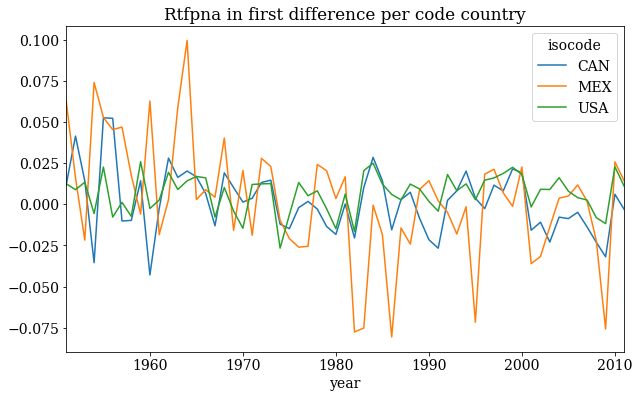

In [40]:
# Basic plot: Rtfpna in first difference per code country

df_tfp_diff.plot()

plt.title('Rtfpna in first difference per code country')
plt.show()

#### New Split data

In [41]:
# Split data into train and test set | data in difference


df_tfp_diff_train = df_tfp_diff[:-10]
df_tfp_diff_test = df_tfp_diff[51:]

In [42]:
# Check train data tail

df_tfp_diff_train.tail()

isocode,CAN,MEX,USA
year,,,
1997,0.011596,0.021249,0.015986
1998,0.008157,0.006883,0.018727
1999,0.021434,-0.001258,0.022458
2000,0.019148,0.022627,0.018057
2001,-0.015750,-0.036040,-0.001606


In [43]:
# Check test data

df_tfp_diff_test

isocode,CAN,MEX,USA
year,,,
2002,-0.010880,-0.031703,0.009091
2003,-0.022958,-0.013761,0.008993
2004,-0.007824,0.003691,0.016148
2005,-0.008693,0.005037,0.007942
2006,-0.004868,0.011751,0.004000
2007,-0.013699,0.001923,0.002595
2008,-0.023076,-0.022125,-0.008096
2009,-0.031875,-0.075669,-0.011761
2010,0.006084,0.025725,0.022725


#### Unit root test | Data in first difference

In [44]:
# PP test for CAN data
# trend: include constante and linear time trend

pp = PhillipsPerron(df_tfp_diff_train.CAN, trend = 'ct') 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.086
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [45]:
# PP test for MEX data 
# trend: include constante and linear time trend

pp = PhillipsPerron(df_tfp_diff_train.MEX, trend = 'ct') 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.181
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [46]:
# PP test for USA data 
# trend: include constante and linear time trend

pp = PhillipsPerron(df_tfp_diff_train.USA, trend = 'ct') 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.864
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.15 (1%), -3.50 (5%), -3.18 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Comments:
    
> * With the series in difference, the hypothesis of the presence of a unit root in all series at 1% significance can be rejected, accepting the hypothesis that the series have a stationary process. That way, we can use this series to model.

> * From the explanatory data analysis that has been done so far, we can start a univariate and multivariate modeling.

## Modeling

> * Here, the ARIMA and VAR models will be used, following the univariate and multivariate modeling of time series.

> * The test statistic that will be used to select the order of the models will be the AIC.

> * Previously, we saw that there is a first indication for not using the VAR model, given the result of the cointegration test. As it is known that the countries analyzed have a close economic and geographic relationship, including a free trade agreement, I will keep the modeling with the VAR.

### Univariate modeling

In [47]:
import pmdarima as pm


#### `CAN`

In [48]:
# ARIMA - CAN model
# MAX_P = 5, MAX_Q = 2  

model_can = pm.auto_arima(df_tfp_train.CAN, start_p=1, start_q=1,
                      test='pp',       
                      max_p=4, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-255.985, BIC=-248.257, Time=0.479 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-254.510, BIC=-250.646, Time=0.072 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-253.469, BIC=-247.674, Time=0.177 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-255.845, BIC=-250.050, Time=0.234 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-254.278, BIC=-252.346, Time=0.062 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-255.219, BIC=-245.560, Time=0.365 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-256.851, BIC=-247.192, Time=0.852 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-258.850, BIC=-251.122, Time=0.346 seconds
Total fit time: 2.625 seconds


In [49]:
# Summary results

print(model_can.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 133.425
Date:                Wed, 08 Jul 2020   AIC                           -258.850
Time:                        16:10:41   BIC                           -251.122
Sample:                             0   HQIC                          -255.897
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.003      1.547      0.122      -0.001       0.009
ma.L1          0.2745      0.148      1.852      0.064      -0.016       0.565
ma.L2         -0.2952      0.201     -1.467      0.1

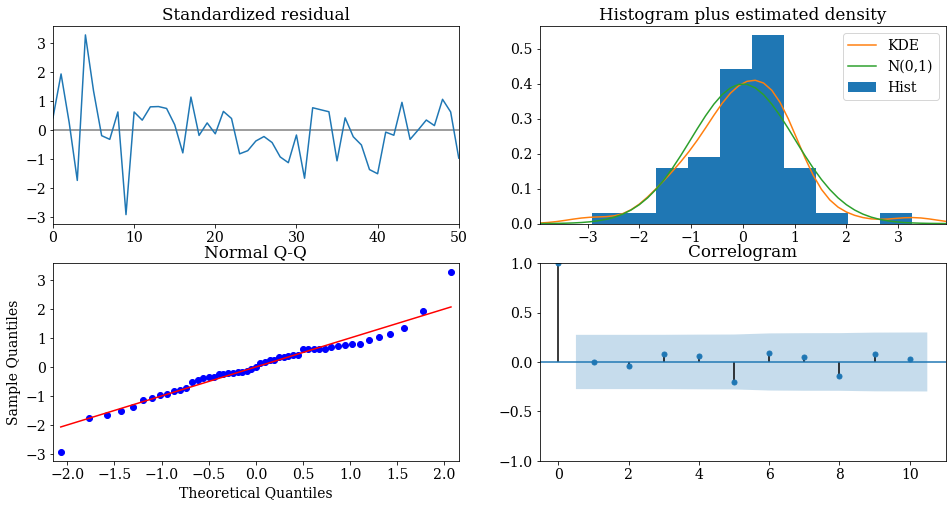

In [50]:
# Diagnostics model

model_can.plot_diagnostics(figsize=(16, 8))
plt.show()

Comments: 
    
> * Best model: ARIMA(0,1,2).
> * The residues have a distribution close to normal and are not significantly correlated.

#### `MEX`

In [51]:
# ARIMA - MEX model
# MAX_P = 5, MAX_Q = 2  

model_mex = pm.auto_arima(df_tfp_train.MEX, start_p=1, start_q=1,
                      test='pp',       # usando o test pp para identificar o 'd'
                      max_p=5, max_q=2, 
                      m=1,              # frequência da série
                      d=None,           # deixar o modelo determinar o 'd'
                      seasonal=False,   # sem sazonalidade
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-191.318, BIC=-183.591, Time=0.576 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-188.213, BIC=-184.349, Time=0.063 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-190.104, BIC=-184.308, Time=0.206 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-189.754, BIC=-183.959, Time=0.216 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-189.394, BIC=-187.462, Time=0.051 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=-189.355, BIC=-179.696, Time=0.821 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-189.508, BIC=-179.849, Time=0.786 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-187.867, BIC=-180.139, Time=0.481 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-188.231, BIC=-180.504, Time=0.209 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-187.334, BIC=-175.743, Time=0.893 seconds
Total fit time: 4.342 seconds


In [52]:
# Summary results

print(model_mex.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  99.659
Date:                Wed, 08 Jul 2020   AIC                           -191.318
Time:                        16:10:48   BIC                           -183.591
Sample:                             0   HQIC                          -188.365
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.001      0.307      0.759      -0.002       0.003
ar.L1          0.9407      0.112      8.421      0.000       0.722       1.160
ma.L1         -0.8011      0.190     -4.227      0.0

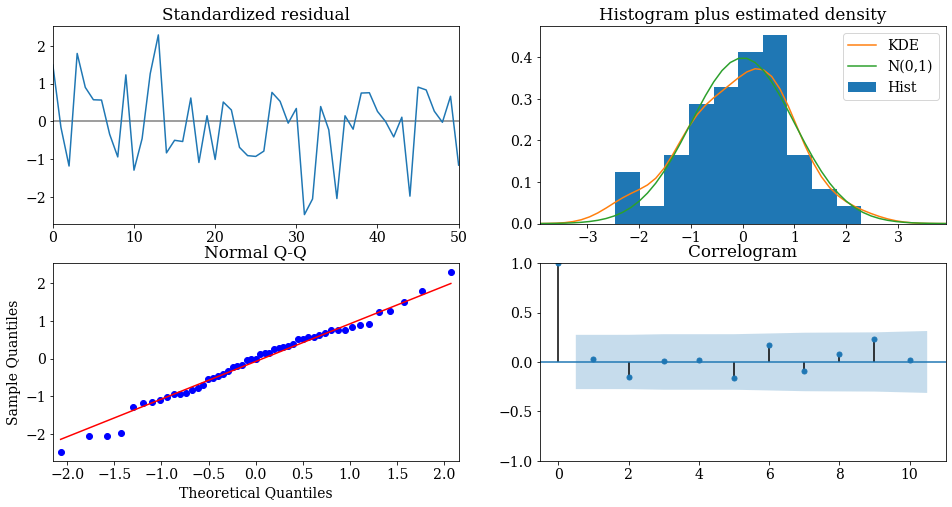

In [53]:
# Diagnostics model

model_mex.plot_diagnostics(figsize=(16, 8))
plt.show()

Comments: 
    
> * Best model: ARIMA(1,1,1).
> * Residues are not significantly correlated.

#### `USA`

In [54]:
# ARIMA - USA model
# MAX_P = 6, MAX_Q = 2  

model_usa = pm.auto_arima(df_tfp_train.USA, start_p=1, start_q=1,
                      test='pp',       
                      max_p=6, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-302.454, BIC=-294.727, Time=0.393 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-306.452, BIC=-302.588, Time=0.072 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-304.467, BIC=-298.671, Time=0.239 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-304.466, BIC=-298.671, Time=0.156 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-293.697, BIC=-291.765, Time=0.045 seconds
Total fit time: 0.938 seconds


In [55]:
# Summary results

print(model_usa.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 155.226
Date:                Wed, 08 Jul 2020   AIC                           -306.452
Time:                        16:10:51   BIC                           -302.588
Sample:                             0   HQIC                          -304.976
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0067      0.002      3.668      0.000       0.003       0.010
sigma2         0.0001   2.98e-05      4.470      0.000    7.47e-05       0.000
Ljung-Box (Q):                       21.71   Jarque-

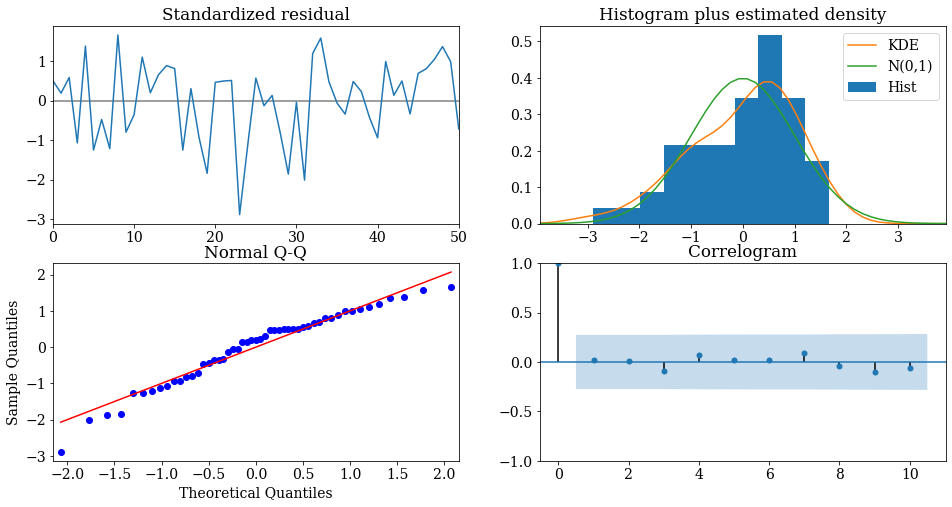

In [56]:
# Diagnostics model

model_usa.plot_diagnostics(figsize=(16, 8))
plt.show()

Comments:
    
> * Best model: ARIMA(0,1,0). 
> * This model is a random walk. Thus, the variations are exclusively stochastic.

### Multivariate modeling

In [57]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [58]:
# Fit and summary - VAr model

var_model = VAR(df_tfp_diff_train)

var_model_best = var_model.fit(ic = 'aic', verbose=True)
var_model_best.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 0, FPE -> 0, HQIC -> 0>
Using 10 based on aic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 08, Jul, 2020
Time:                     16:10:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.3956
Nobs:                     41.0000    HQIC:                  -23.8671
Log likelihood:           436.761    FPE:                4.18544e-11
AIC:                     -25.2825    Det(Omega_mle):     7.72849e-12
--------------------------------------------------------------------
Results for equation CAN
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.013904         0.007936           -1.752           0.080
L1.CAN          0.017621         0.368263            0.048           0.962
L1.MEX         -0.110925         0.105811           -1.048           0.294
L1.USA     

In [59]:
# Fit model

lag_order = 10 #indica lag order

model_fitted = var_model.fit(lag_order) 
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 08, Jul, 2020
Time:                     16:10:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -21.3956
Nobs:                     41.0000    HQIC:                  -23.8671
Log likelihood:           436.761    FPE:                4.18544e-11
AIC:                     -25.2825    Det(Omega_mle):     7.72849e-12
--------------------------------------------------------------------
Results for equation CAN
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.013904         0.007936           -1.752           0.080
L1.CAN          0.017621         0.368263            0.048           0.962
L1.MEX         -0.110925         0.105811           -1.048           0.294
L1.USA     

### Durbin Watson Test

> * This test allows to analyze if there is any correlation in the residues. To maintain the use of the VAR in the form that was modeled, it is expected that this correlation is not observed.

> * The test results range from 0 to 4. The closer to 0 or 4, the greater the residual correlation indicator. The closer to 2, the greater the indicative of no correlation of the residues.

In [60]:
from statsmodels.stats.stattools import durbin_watson


In [61]:
def adjust(value, length= 6): return str(value).ljust(length)
resid_out = durbin_watson(model_fitted.resid)

for col, value in zip(df_tfp_diff.columns, resid_out):
    print(adjust(col), ':', value)

CAN    : 2.13009154614086
MEX    : 1.6583138025923685
USA    : 1.854709294941103


Comments:
    
> cAs the test results are close to 2, we have an indication of non-correlation of the residues. We can maintain the estimated VAR model.

## Item 2 - Case 1

> Forecast 10 years of the series (if you are performing the exercise in R, use package “forecast”).

## Out-of-sample Forecast

### ARIMA models

In [62]:
# Set forecast horizon and index for visualization

n_periods = 10

index_of_all = df_tfp.index
index_of_fc = df_tfp_test.index

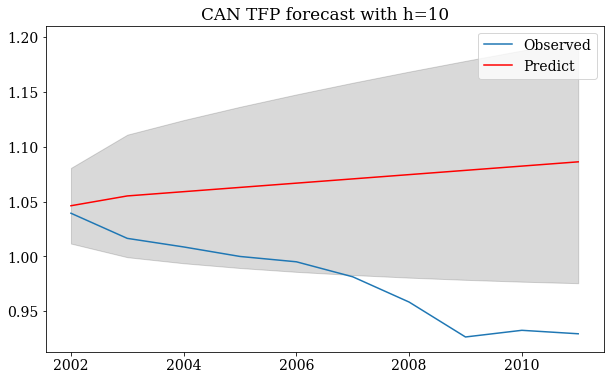

In [63]:
# Forecast - CAN Model - ARIMA(0,1,2)

# Forecast and confidence interval
fc_arima_can, confint_arima_can = model_can.predict(n_periods=n_periods, return_conf_int=True) #forecast CAN model

# Prepare for visualization
fc_arima_can = pd.Series(fc_arima_can, index=index_of_fc)
lower_series_can = pd.Series(confint_arima_can[:, 0], index=index_of_fc)
upper_series_can = pd.Series(confint_arima_can[:, 1], index=index_of_fc)


# Plot: Forecast and confidence interval
plt.plot(df_tfp_test.CAN)
plt.plot(fc_arima_can, color='red')
plt.legend(['Observed','Predict'])
plt.fill_between(lower_series_can.index, 
                 lower_series_can, 
                 upper_series_can, 
                 color='k', alpha=.15)

plt.title("CAN TFP forecast with h=10")
plt.show()

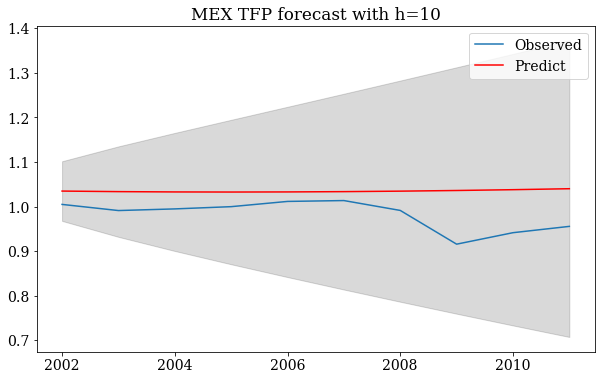

In [64]:
# Forecast - MEX Model - ARIMA(1,1,1)

# Forecast and confidence interval
fc_arima_mex, confint_arima_mex = model_mex.predict(n_periods=n_periods, return_conf_int=True) 

# Prepare for visualization
fc_arima_mex = pd.Series(fc_arima_mex, index=index_of_fc)
lower_series_mex = pd.Series(confint_arima_mex[:, 0], index=index_of_fc)
upper_series_mex = pd.Series(confint_arima_mex[:, 1], index=index_of_fc)


# Plot: Forecast and confidence interval
plt.plot(df_tfp_test.MEX)
plt.plot(fc_arima_mex, color='red')
plt.legend(['Observed','Predict'])
plt.fill_between(lower_series_mex.index, 
                 lower_series_mex, 
                 upper_series_mex, 
                 color='k', alpha=.15)

plt.title("MEX TFP forecast with h=10")
plt.show()

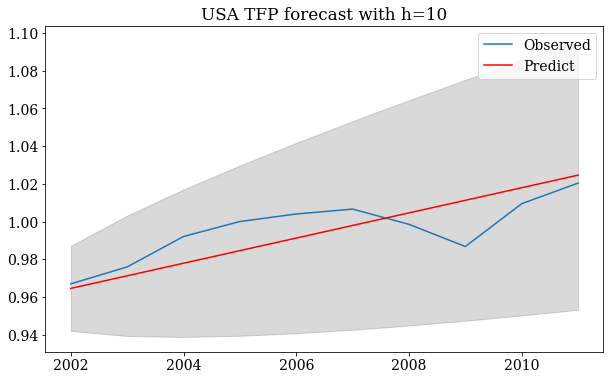

In [65]:
# Forecast - MEX Model - ARIMA(0,1,0)

# Forecast and confidence interval
fc_arima_usa, confint_arima_usa = model_usa.predict(n_periods=n_periods, return_conf_int=True) 

# Prepare for visualization
fc_arima_usa = pd.Series(fc_arima_usa, index=index_of_fc)
lower_series_usa = pd.Series(confint_arima_usa[:, 0], index=index_of_fc)
upper_series_usa = pd.Series(confint_arima_usa[:, 1], index=index_of_fc)


# Plot: Forecast and confidence interval
plt.plot(df_tfp_test.USA)
plt.plot(fc_arima_usa, color='red')
plt.legend(['Observed','Predict'])
plt.fill_between(lower_series_usa.index, 
                 lower_series_usa, 
                 upper_series_usa, 
                 color='k', alpha=.15)

plt.title("USA TFP forecast with h=10")
plt.show()

Comments:
    
> * Among the forecasts, only that of the CAN model was observed a true value outside the confidence interval.

> * The MEX model managed to follow the real data well, the same situation was observed for the USA, however it is a random walk.

### VAR model

In [66]:
# Forecast VAR model

fc_var = model_fitted.forecast(y=df_tfp_diff_train[-lag_order:].values, steps=10)
df_fc_var = pd.DataFrame(fc_var, index=df_tfp_diff.index[-10:], columns=df_tfp_diff.columns)
df_fc_var


isocode,CAN,MEX,USA
year,,,
2002,0.012393,0.024261,0.018478
2003,-0.010311,-0.001948,-0.007622
2004,0.004292,0.009124,0.017540
2005,0.011637,0.006889,0.022633
2006,0.027096,0.063257,0.010985
2007,0.015113,0.013574,0.011781
2008,-0.010524,-0.006220,-0.016551
2009,0.003552,-0.022945,0.010721
2010,-0.000423,-0.040224,-0.000182


In [67]:
def reverse_difference_forecast(forecast, data_train):
    """
    Reverse difference forecast
    
    É preciso reverter os dados que estão em primeira diferença para o seu
    nível original, a fim de ser possuivel uma comparação com os modelos 
    univariados.
    
    Basicamente é usado um rearranjo da equação da primeira diferença, a fim de
    recuperar a série em nível. 
    
    """
    
    for column in data_train.columns:
        forecast[column].iloc[0] = forecast[column].iloc[0] + data_train[column].iloc[-1]
    
    for index in range(1, 10):
        for column in data_train.columns:
            forecast[column].iloc[index] = forecast[column].iloc[index] + forecast[column].iloc[index-1]
    
   
    return forecast


In [68]:
# Reverse to original form of data

fc_var = reverse_difference_forecast(df_fc_var, df_tfp_train)
fc_var

isocode,CAN,MEX,USA
year,,,
2002,1.062747,1.060996,0.976304
2003,1.052436,1.059049,0.968682
2004,1.056727,1.068173,0.986222
2005,1.068364,1.075062,1.008855
2006,1.095461,1.138319,1.019840
2007,1.110573,1.151892,1.031621
2008,1.100049,1.145672,1.015070
2009,1.103601,1.122727,1.025791
2010,1.103178,1.082503,1.025609


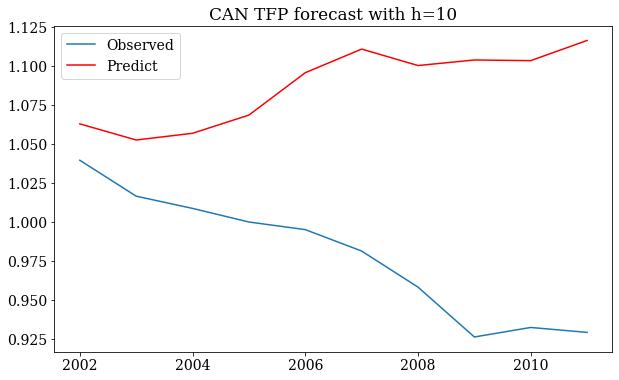

In [69]:
# Forecast - CAN - VAR

plt.plot(df_tfp_test.CAN)
plt.plot(fc_var['CAN'], color='red')
plt.legend(['Observed','Predict'])

plt.title("CAN TFP forecast with h=10")
plt.show()

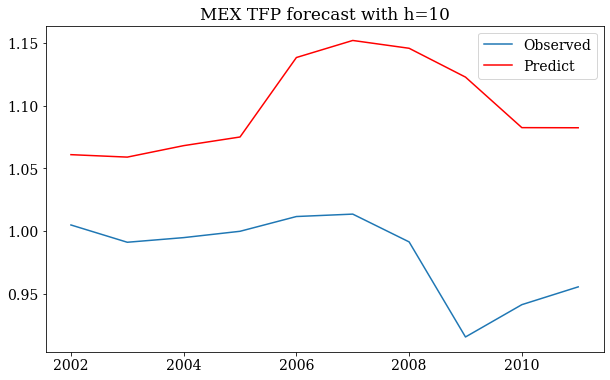

In [70]:
# Forecast - MEX - VAR

plt.plot(df_tfp_test.MEX)
plt.plot(fc_var['MEX'], color='red')
plt.legend(['Observed','Predict'])

plt.title("MEX TFP forecast with h=10")
plt.show()

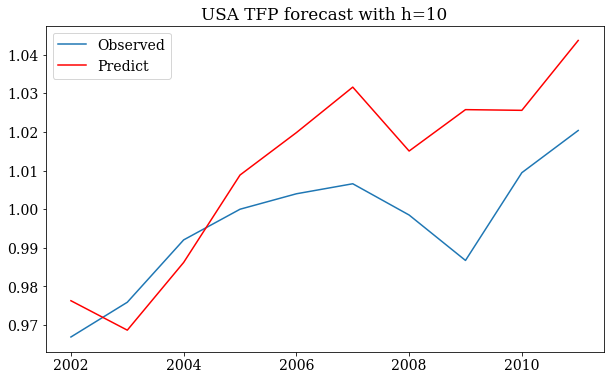

In [71]:
# Forecast - USA - VAR

plt.plot(df_tfp_test.USA)
plt.plot(fc_var['USA'], color='red')
plt.legend(['Observed','Predict'])

plt.title("USA TFP forecast with h=10")
plt.show()

Figure(720x720)


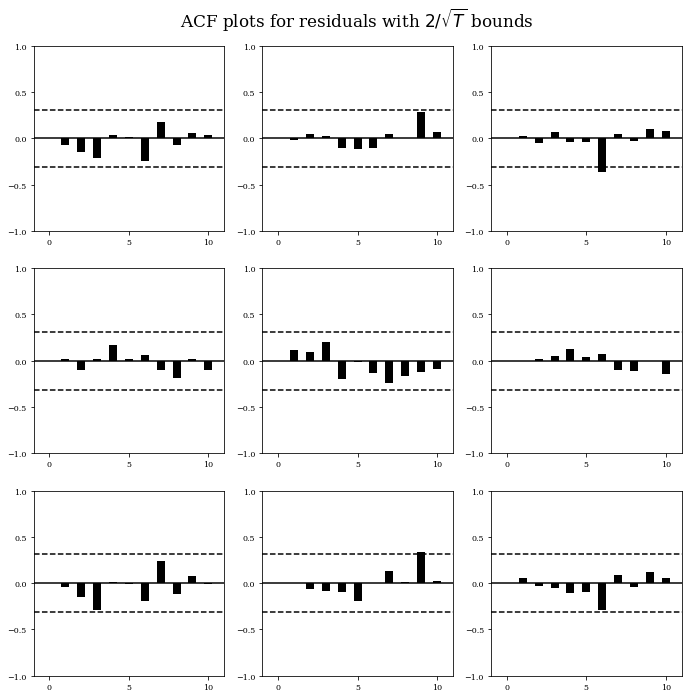

In [72]:
# ACF plot for residuals

print(model_fitted.plot_acorr())

Comments:
    
> * Forecasts for MEX and USA behaved similarly to the true data, but at a different level. The predictions for CAN, on the other hand, were bad.

> * VAR residues do not indicate the presence of significant autocorrelation.

### Forecast Accuracy

> * Here, the metrics of MSPE and MAPE will be used to evaluate the predictions of the models.

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [74]:
def forecast_accuracy(data_pred, data_observed, column_names):
    """
    Summaty forecast accuracy results
    
    """
    
    result = pd.DataFrame(index=['MSPE','MAPE'], columns=column_names)
    
    result_col = 0
    for column in data_observed.columns:
        mspe = mean_squared_error(data_observed[column], data_pred[column])
        mape = mean_absolute_error(data_observed[column], data_pred[column])
        
        result.iloc[0, result_col] = mspe
        result.iloc[1, result_col] = mape
        
        result_col += 1
        
    return result

In [75]:
# Join arima forecast data

fc_arima = pd.DataFrame()

fc_arima['CAN'] = fc_arima_can
fc_arima['MEX'] = fc_arima_mex
fc_arima['USA'] = fc_arima_usa
fc_arima

,CAN,MEX,USA
year,,,
2002,1.046314,1.034954,0.964505
2003,1.055269,1.033726,0.971185
2004,1.059162,1.033017,0.977865
2005,1.063054,1.032797,0.984545
2006,1.066946,1.033036,0.991225
2007,1.070838,1.033709,0.997905
2008,1.074730,1.034789,1.004585
2009,1.078622,1.036251,1.011265
2010,1.082514,1.038074,1.017945


In [76]:
# Forecast accuracy - ARIMA

fc_acc_arima = forecast_accuracy(fc_arima, df_tfp_test, ['CAN_ARIMA','MEX_ARIMA','USA_ARIMA'])
fc_acc_arima

,CAN_ARIMA,MEX_ARIMA,USA_ARIMA
MSPE,0.0105045,0.00388768,0.000143562
MAPE,0.0895797,0.05291,0.0101577


In [77]:
# Forecast accuracy - VAR

fc_acc_var = forecast_accuracy(fc_var, df_tfp_test, ['CAN_VAR','MEX_VAR','USA_VAR'])
fc_acc_var

,CAN_VAR,MEX_VAR,USA_VAR
MSPE,0.0150959,0.0156274,0.000373391
MAPE,0.108116,0.116531,0.0167253


Comments:
    
> * The univariate models obtained less errors in relation to the multivariate ones, that is, the ARIMA models were more accurate.

> * To say that the predictions were statistically better, it would be necessary to test, using the Diebold-Mariano test (this being the one indicated for the specific case).

## Item 3 - Case 1

> Check in the following link pages 2 and 3: https://cran.r-project.org/web/packages/pwt8/pwt8.pdf to see a list of all variables in the original dataset. Can you think about another feature that could be helpful in explaining TFP series? Explain.

> Based on 'Capital, labor and TFP in PWT8.0' (INKLAR & TIMMER, 2013), it would be interesting to add covariates related to product, human capital and capital stock, which are strictly related to TFP, since the construction of this variable.


> The covariates being:
> * `hc` - Index of human capital per person, based on years of schooling (Barro and Lee 2013) and returns
to education (Psacharopoulos 1994).
> * `cgdpo` - Output-side GDP at current PPPs (in million 2005 USD).
> * `ck` - Capital stock at current PPPs (in million 2005 USD).
> * `pl_i` - Price level of capital formation (price level of USA GDPo in 2005 = 1).
> * `pl_k` - Price level of the capital stock (price level of USA in 2005 = 1.


Principal source: http://piketty.pse.ens.fr/files/InklaarTimmer13.pdf

# Case 2

## Import data

In [78]:
try: 
    df_comex = pd.read_csv('data_comexstat.csv', encoding = 'Latin-1')
    print('File 1 loading - Success!')
    df_covar = pd.read_excel('covariates.xlsx')
    print('File 2 loading - Success!')
except:
    print('File loading - Failed!')

File 1 loading - Success!
File 2 loading - Success!


## Exploratory Data Analysis

In [79]:
# Head data check

df_comex.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [80]:
# Info data check

df_comex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
date       117965 non-null object
product    117965 non-null object
state      117965 non-null object
country    117965 non-null object
type       117965 non-null object
route      117965 non-null object
tons       117965 non-null float64
usd        117965 non-null float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


Comments:

> * Missing value only on the first line.

In [81]:
# Head data check

df_covar.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


In [82]:
# Info data check

df_covar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
year                  52 non-null int64
price_soybeans        51 non-null float64
price_corn            51 non-null float64
price_soybean_meal    51 non-null float64
gdp_china             52 non-null float64
gdp_iran              52 non-null float64
gpd_netherlands       51 non-null float64
gdp_spain             52 non-null float64
gdp_thailand          52 non-null float64
gdp_world             52 non-null float64
gdp_egypt             52 non-null float64
gdp_japan             52 non-null float64
gdp_vietnam           52 non-null float64
dtypes: float64(12), int64(1)
memory usage: 5.4 KB


Comments:

> Missing value apensas na primeira linha, posso descartar caso necessario. 

## Item 1 - Case 2

> 1. Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’.

> * Basically, we have: 2 filters, which would be 'Type = Export' and 'product = soybeans or soybean oil or soybean meal'; 2 aggregations, since the data are at the state level, we have to aggregate at the country level, and aggregate the monthly data for annuals.

### Prepare data for visualization

In [83]:
# Filters

df_temp = df_comex[ df_comex['type'] == 'Export'] #filter by type

df_temp = df_temp[ df_temp['product'].isin(['soybeans','soybean_oil','soybean_meal']) ]  #filter by product

# Group by
df_temp = df_temp.groupby(['date','product'])[['tons','usd']].sum()

# Reset index
df_temp.reset_index(inplace=True) 

# Change data format
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%m/%Y')

In [84]:
# Pivot table

df_temp_usd = df_temp.pivot(index='date', columns='product', values='usd')
df_temp_usd

product,soybean_meal,soybean_oil,soybeans
date,,,
01/1997,133239012.0,34717077.0,4.118740e+06
01/1998,78284388.0,13601299.0,6.819330e+05
01/1999,115200364.0,37921236.0,9.115549e+06
01/2000,69173136.0,13128993.0,5.507660e+06
01/2001,174883937.0,27442599.0,4.797052e+07
...,...,...,...
12/2015,386597279.0,115338933.0,2.817208e+08
12/2016,372004358.0,59166636.0,2.731218e+08
12/2017,236110837.0,39731081.0,9.133119e+08


In [85]:
# Pivot table

df_temp_tons = df_temp.pivot(index='date', columns='product', values='tons')
df_temp_tons

product,soybean_meal,soybean_oil,soybeans
date,,,
01/1997,486775.060,66915.872,14030.000
01/1998,305397.731,21378.945,1624.160
01/1999,727099.273,64680.249,39262.486
01/2000,428397.944,34896.985,33611.620
01/2001,863754.986,93861.429,244027.786
...,...,...,...
12/2015,1042707.478,175433.739,731439.903
12/2016,1012049.282,73989.384,653098.393
12/2017,674057.295,50943.495,2355418.012


In [86]:
# Get year data

# Base on usd
temp = df_temp_usd.copy()
temp.reset_index(inplace=True)  # Reset index
temp.date = pd.to_datetime(temp.date).dt.strftime('%Y') # Change data format

df_temp_usd_y = temp.groupby(['date'])[['soybeans','soybean_oil','soybean_meal']].sum()

# base on tons
temp = df_temp_tons.copy() #copy
temp.reset_index(inplace=True)  # Reset index
temp.date = pd.to_datetime(temp.date).dt.strftime('%Y') # Change data format

df_temp_tons_y = temp.groupby(['date'])[['soybeans','soybean_oil','soybean_meal']].sum()

### Visualization

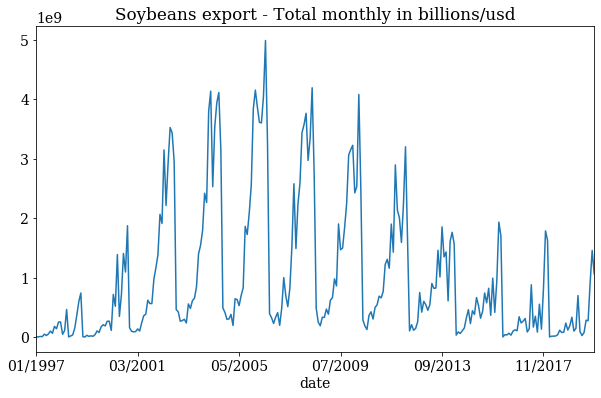

In [87]:
# Basic plot

df_temp_usd.soybeans.plot()

plt.title('Soybeans export - Total monthly in billions/usd')
plt.show()

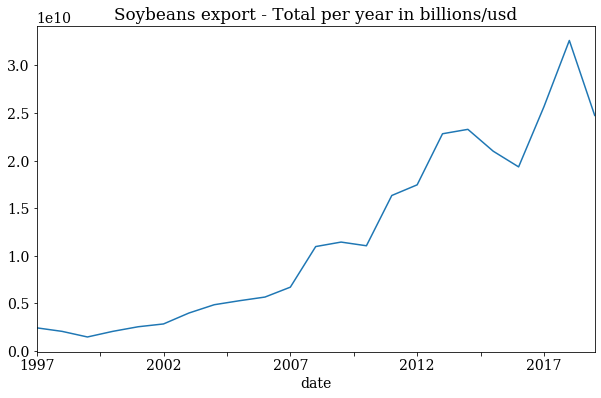

In [88]:
# Basic plot

df_temp_usd_y.soybeans.plot()

plt.title('Soybeans export - Total per year in billions/usd')
plt.show()

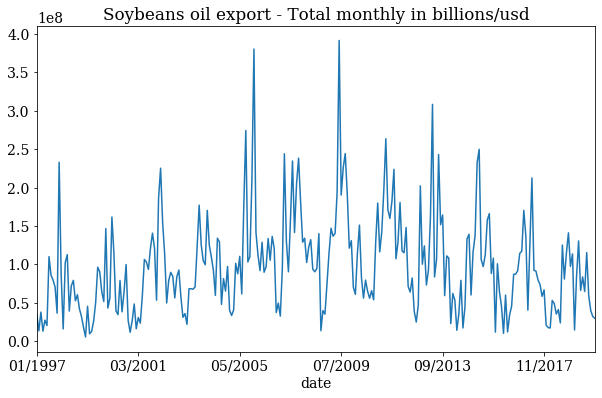

In [89]:
# Basic plot

df_temp_usd.soybean_oil.plot()

plt.title('Soybeans oil export - Total monthly in billions/usd')
plt.show()

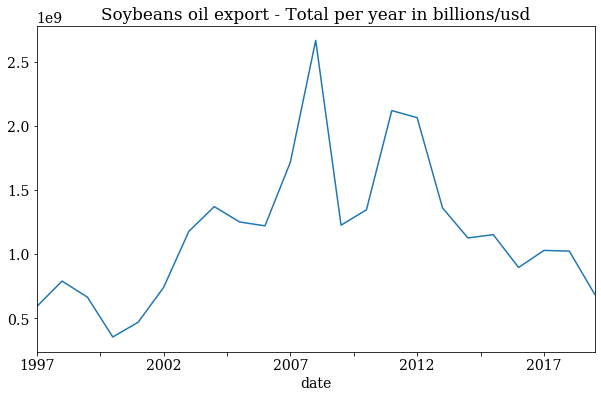

In [90]:
# Basic plot

df_temp_usd_y.soybean_oil.plot()

plt.title('Soybeans oil export - Total per year in billions/usd')
plt.show()

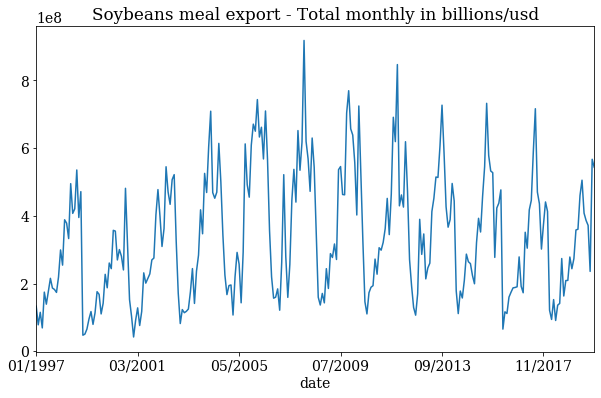

In [91]:
# Basic plot

df_temp_usd.soybean_meal.plot()

plt.title('Soybeans meal export - Total monthly in billions/usd')
plt.show()

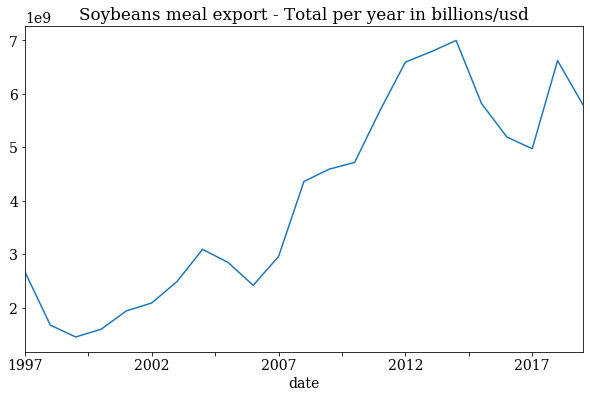

In [92]:
# Basic plot

df_temp_usd_y.soybean_meal.plot()

plt.title('Soybeans meal export - Total per year in billions/usd')
plt.show()

## Item 2 - Case 2

> 2. What are the 3 most important products exported by Brazil in the last 5 years?

### Adicional information

In [93]:
# how many products do I have?

df_comex['product'].unique()

array(['corn', 'soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'], dtype=object)

### Prepare data

In [94]:
# Filters by type
df_temp = df_comex[ df_comex['type'] == 'Export'] 

# Change data format
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Group by
df_temp = df_temp.groupby(['date','product'])[['tons','usd']].sum()

# Reset index
df_temp.reset_index(inplace=True) 

In [95]:
# Head check

df_temp.head(10)

,date,product,tons,usd
0,1997,corn,356895.029,5.163493e+07
1,1997,soybean_meal,9965945.186,2.668177e+09
2,1997,soybean_oil,1117451.178,5.923224e+08
3,1997,soybeans,8195025.114,2.407409e+09
4,1997,sugar,2521669.683,7.242544e+08
5,1998,corn,6033.643,1.155060e+07
6,1998,soybean_meal,9947875.071,1.671167e+09
7,1998,soybean_oil,1300080.071,7.915809e+08
8,1998,soybeans,8679492.322,2.036069e+09
9,1998,sugar,3535547.848,8.376088e+08


In [96]:
# Pivot and select data

df_temp2_usd = df_temp.pivot(index='date', columns='product', values='usd')
df_temp2_usd = df_temp2_usd[-5:]
df_temp2_usd

product,corn,soybean_meal,soybean_oil,soybeans,sugar,wheat
date,,,,,,
2015,5.002189e+09,5.821009e+09,1.153975e+09,2.097567e+10,7.569996e+09,353335814.0
2016,3.736202e+09,5.192781e+09,8.975183e+08,1.932843e+10,1.038813e+10,115392534.0
2017,4.628510e+09,4.973223e+09,1.030942e+09,2.566280e+10,1.137459e+10,102835660.0
2018,3.956254e+09,6.624036e+09,1.025232e+09,3.261986e+10,6.490856e+09,40527570.0
2019,7.124566e+09,5.796674e+09,6.882796e+08,2.473877e+10,5.114913e+09,114853808.0


In [97]:
# Pivot and select data

df_temp2_tons = df_temp.pivot(index='date', columns='product', values='tons')
df_temp2_tons = df_temp2_tons[-5:]
df_temp2_tons

product,corn,soybean_meal,soybean_oil,soybeans,sugar,wheat
date,,,,,,
2015,2.890038e+07,1.482660e+07,1669874.182,5.430348e+07,2.380948e+07,1778870.494
2016,2.186444e+07,1.444379e+07,1253542.300,5.157381e+07,2.880695e+07,713326.228
2017,2.925533e+07,1.417674e+07,1342365.392,6.800659e+07,2.861423e+07,617664.418
2018,2.274727e+07,1.666998e+07,1414356.108,8.214744e+07,2.114488e+07,221278.511
2019,4.183192e+07,1.653038e+07,1031289.620,7.030014e+07,1.765812e+07,554696.613


### Vizualization

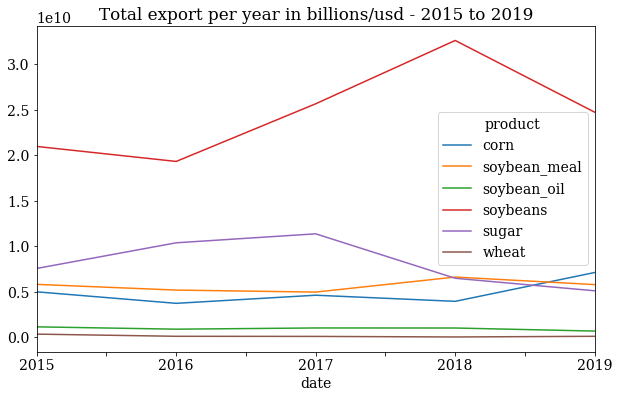

In [98]:
# Basic plot

df_temp2_usd.plot()

plt.title('Total export per year in billions/usd - 2015 to 2019')
plt.show()

In [99]:
# Total accumulated

for column in df_temp2_usd.columns:
    total_period = sum(df_temp2_usd[column])
    print('Total %s export in billions of usd is: %s \n' % (column, total_period/1000000000))    

Total corn export in billions of usd is: 24.44772091 

Total soybean_meal export in billions of usd is: 28.407723437 

Total soybean_oil export in billions of usd is: 4.795946873 

Total soybeans export in billions of usd is: 123.325529857 

Total sugar export in billions of usd is: 40.938486021 

Total wheat export in billions of usd is: 0.726945386 



Comments:
    
> * Soybeans , Sugar  and Soybean_meal are the 3 most important products exported by Brazil in the last 5 years.

## Item 3 - Case 2

> 3. What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?

### Item 3.1 - main route

In [100]:
# Filters

df_temp = df_comex[ df_comex['type'] == 'Export'] #filter by type

df_temp = df_temp[ df_temp['product'] == 'corn' ]  #filter by product

# Change data format
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Group by
df_temp = df_temp.groupby(['date','route'])[['usd']].sum()

# Reset index
df_temp.reset_index(inplace=True) 

# Pivot table
df_temp3 = df_temp.pivot(index='date', columns='route', values='usd')
df_temp3

route,Air,Ground,Other,River,Sea
date,,,,,
1997,211120.0,7139185.0,33715.0,NaN,4.425091e+07
1998,83438.0,5515412.0,81798.0,NaN,5.869953e+06
1999,177534.0,5453204.0,61674.0,NaN,1.113877e+06
2000,159469.0,7253407.0,17538.0,NaN,1.493446e+06
2001,123122.0,2371886.0,1930.0,NaN,4.753710e+08
2002,129246.0,5436253.0,2104.0,362611.0,2.595088e+08
2003,132442.0,4041447.0,NaN,1876974.0,3.629310e+08
2004,159120.0,9078129.0,71595.0,7000430.0,5.673501e+08
2005,270580.0,9143842.0,62.0,NaN,1.113189e+08


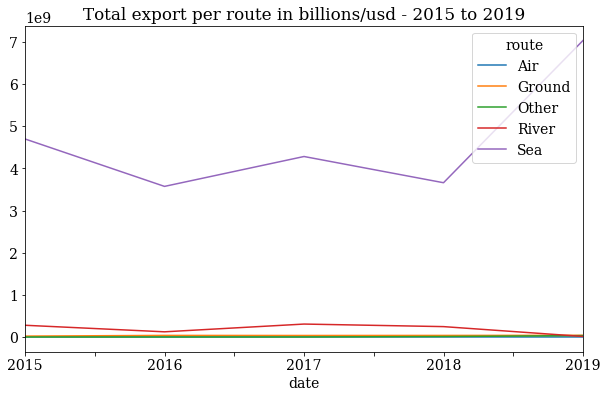

In [101]:
# Basic Plot 

df_temp3[-5:].plot()

plt.title('Total export per route in billions/usd - 2015 to 2019')
plt.show()

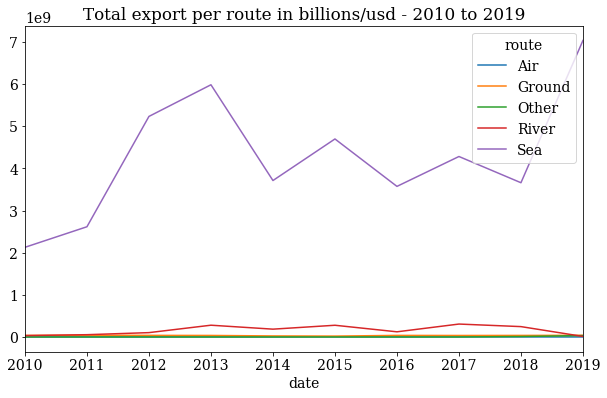

In [102]:
# Basic Plot 

df_temp3[-10:].plot()

plt.title('Total export per route in billions/usd - 2010 to 2019')
plt.show()

Comments:
    
> The main route is *sea*, considering the last 5 or 10 years.

### Item 3.2 - route matter?

In [103]:
# Filter by type
df_temp = df_comex[ df_comex['type'] == 'Export'] 

# Group by
df_temp = df_temp.groupby(['product','route'])[['usd']].sum()

# Reset index
df_temp.reset_index(inplace=True)

In [104]:
# Total export per product and route

print('\n',' '*7,'Total export per product and route\n','--'*26)

for column in df_temp['product'].unique():
    
    df_temp_c = df_temp[ df_temp['product'].isin([str(column)]) ] 
    print(' '*15,'Product: %s \n' % column,'--'*26)
    
    if column == 'wheat':
        for i in range(4):
            print('Route: ', adjust(df_temp_c.iloc[i,1]),' Percent: ', 
                  adjust( round((df_temp_c.iloc[i,2])/(df_temp_c.usd.sum())*100),3) )
    else:
        for i in range(5):
            print('Route: ', adjust(df_temp_c.iloc[i,1]),' Percent: ', 
                  adjust( round((df_temp_c.iloc[i,2])/(df_temp_c.usd.sum())*100),3) )
    print()
    print('--'*26)


         Total export per product and route
 ----------------------------------------------------
                Product: corn 
 ----------------------------------------------------
Route:  Air     Percent:  0.0
Route:  Ground  Percent:  1.0
Route:  Other   Percent:  0.0
Route:  River   Percent:  3.0
Route:  Sea     Percent:  96.0

----------------------------------------------------
                Product: soybean_meal 
 ----------------------------------------------------
Route:  Air     Percent:  0.0
Route:  Ground  Percent:  0.0
Route:  Other   Percent:  0.0
Route:  River   Percent:  0.0
Route:  Sea     Percent:  100.0

----------------------------------------------------
                Product: soybean_oil 
 ----------------------------------------------------
Route:  Air     Percent:  0.0
Route:  Ground  Percent:  1.0
Route:  Other   Percent:  0.0
Route:  River   Percent:  0.0
Route:  Sea     Percent:  98.0

----------------------------------------------------
               

Comments:
    
> It can be easily seen that each product passes almost entirely through only one route. Thus, when exporting different products, the route matters.

## Item 4 - Case 2

> 4. Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?

> The commercial partnership indicator used here will be total volume in USD of import and export. 

In [105]:
# Prepare temporary data

# Filter by product
df_temp = df_comex[ df_comex['product'].isin(['corn','sugar']) ]  

# Change data format
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Group by
df_temp = df_temp.groupby(['date','product','type','country'])[['usd']].sum()

# Reset index
df_temp.reset_index(inplace=True)

# Select: last 3 years
df_temp = df_temp[ df_temp['date'].isin(['2019','2018','2017']) ] 
df_temp

,date,product,type,country,usd
3221,2017,corn,Export,Algeria,78619482.0
3222,2017,corn,Export,Angola,3285862.0
3223,2017,corn,Export,Argentina,7368989.0
3224,2017,corn,Export,Bangladesh,158604367.0
3225,2017,corn,Export,Belgium,4954.0
...,...,...,...,...,...
3920,2019,sugar,Import,Taiwan,338.0
3921,2019,sugar,Import,Thailand,1383.0
3922,2019,sugar,Import,Turkey,81.0
3923,2019,sugar,Import,United Kingdom,0.0


In [106]:
# Corn


# Select product
df_temp4_corn = df_temp[ df_temp['product'].isin(['corn']) ]

# Group by
df_temp4_corn = df_temp4_corn.groupby(['type','country'])[['usd']].sum()

# Reset index
df_temp4_corn.reset_index(inplace=True)

# Pivot Table
df_temp4_corn = df_temp4_corn.pivot(index='country', columns='type', values='usd')

# Imput data
df_temp4_corn = df_temp4_corn.fillna(0)

# Create feature 'Total_trade'
df_temp4_corn['Total_trade'] =  df_temp4_corn['Export'] + df_temp4_corn['Import']

# Reset index
df_temp4_corn.reset_index(inplace=True)

In [107]:
# Top 10 partners - corn total trade - 2017 to 2019 

df_temp4_corn.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
46,Iran,2.822336e+09,0.0,2.822336e+09
53,Japan,1.574976e+09,0.0,1.574976e+09
110,Vietnam,1.551035e+09,0.0,1.551035e+09
31,Egypt,1.375065e+09,0.0,1.375065e+09
93,Spain,1.335770e+09,10635.0,1.335780e+09
92,South Korea,1.024568e+09,0.0,1.024568e+09
99,Taiwan,8.155653e+08,0.0,8.155653e+08
61,Malaysia,6.963335e+08,0.0,6.963335e+08
8,Bangladesh,5.278790e+08,0.0,5.278790e+08
80,Paraguay,9.463514e+07,374158249.0,4.687934e+08


In [108]:
# Sugar


# Select product
df_temp4_sugar = df_temp[ df_temp['product'].isin(['sugar']) ]

# Group by
df_temp4_sugar = df_temp4_sugar.groupby(['type','country'])[['usd']].sum()

# Reset index
df_temp4_sugar.reset_index(inplace=True)

# Pivot Table
df_temp4_sugar = df_temp4_sugar.pivot(index='country', columns='type', values='usd')

# Imput data
df_temp4_sugar = df_temp4_sugar.fillna(0)

# Create feature 'Total_trade'
df_temp4_sugar['Total_trade'] =  df_temp4_sugar['Export'] + df_temp4_sugar['Import']

# Reset index
df_temp4_sugar.reset_index(inplace=True)

In [109]:
# Top 10 partners - sugar total trade - 2017 to 2019 

df_temp4_sugar.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
2,Algeria,2.176381e+09,0.0,2.176381e+09
13,Bangladesh,2.063175e+09,0.0,2.063175e+09
68,India,1.696095e+09,422.0,1.696095e+09
148,United Arab Emirates,1.538398e+09,0.0,1.538398e+09
120,Saudi Arabia,1.380456e+09,0.0,1.380456e+09
103,Nigeria,1.336515e+09,0.0,1.336515e+09
71,Iraq,1.158541e+09,0.0,1.158541e+09
86,Malaysia,1.039031e+09,0.0,1.039031e+09
43,Egypt,1.010584e+09,0.0,1.010584e+09
95,Morocco,9.315804e+08,0.0,9.315804e+08


Comments:
    
> * Basically Brazil is an exporter of corn and sugar.

> * Export destination:
    > * corn: diverse, almost all continents, except Oceania. 
    > * sugar: concentrated, Asia in the near region and in the Middle East.

## Item 5 - Case 2

> 5. For each of the products in the dataset, show the 5 most important states in terms of exports?

In [110]:
# Filters
df_temp = df_comex[ df_comex['type'] == 'Export'] #filter by type

# Change data format
#df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Group by
df_temp = df_temp.groupby(['product','state'])[['usd']].sum()

# Reset index
df_temp.reset_index(inplace=True)
df_temp

,product,state,usd
0,corn,AC,1.857114e+06
1,corn,AL,1.800000e+01
2,corn,AM,6.620000e+02
3,corn,AP,2.498760e+05
4,corn,BA,1.476464e+08
...,...,...,...
131,wheat,RJ,3.124800e+04
132,wheat,RO,3.275000e+03
133,wheat,RS,1.555925e+09
134,wheat,SC,2.540009e+07


In [111]:
def summary_most_important_state_per_product(data=df_temp, products=['corn']):
    
    """
    Summary top 5 states base on export importance per product
    
    """
    
    print('\n5 most important states in terms of exports per product\n','--'*26)
    
    for product in products:
        temp = data[ data['product'] == str(product) ]
        temp = temp.nlargest(5,'usd')
        
        
        print(' '*15,'Product: %s \n' % product,'--'*26)
        print('  1º:  %s \n  2º:  %s \n  3º:  %s \n  4º:  %s \n  5º:  %s ' % 
              (temp['state'].iloc[0],temp['state'].iloc[1],temp['state'].iloc[2],temp['state'].iloc[3],temp['state'].iloc[4]))

    return print()

In [112]:
# Summary importante stats per product

summary_most_important_state_per_product(products=['corn','soybean_meal', 'soybean_oil', 'soybeans', 'sugar',
       'wheat'])


5 most important states in terms of exports per product
 ----------------------------------------------------
                Product: corn 
 ----------------------------------------------------
  1º:  MT 
  2º:  PR 
  3º:  GO 
  4º:  MS 
  5º:  SP 
                Product: soybean_meal 
 ----------------------------------------------------
  1º:  MT 
  2º:  PR 
  3º:  RS 
  4º:  GO 
  5º:  BA 
                Product: soybean_oil 
 ----------------------------------------------------
  1º:  PR 
  2º:  RS 
  3º:  MT 
  4º:  SC 
  5º:  GO 
                Product: soybeans 
 ----------------------------------------------------
  1º:  MT 
  2º:  PR 
  3º:  RS 
  4º:  GO 
  5º:  MS 
                Product: sugar 
 ----------------------------------------------------
  1º:  SP 
  2º:  MG 
  3º:  PR 
  4º:  AL 
  5º:  MS 
                Product: wheat 
 ----------------------------------------------------
  1º:  RS 
  2º:  PR 
  3º:  SC 
  4º:  SP 
  5º:  MS 



## Item 6 - Case 2

> 6. Now, we ask you to show your modelling skills. Feel free to use any type of modelling approach, but bear in mind that the modelling approach depends on the nature of your data, and so different models yield different estimates and forecasts. To help you out in this task we also provide you with a dataset of possible covariates (.xlsx). They all come from public sources (IMF, World Bank) and are presented in index number format. Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

### Approach

> * 1. EDA and Data Preparation
> * 2. Modeling
> * 3. Forecast
> * 4. Forecast Accuracy

> * Limitation of data numbers, 24 observations with data annually, and to select the best method, I need to remove part of the sample to serve as validation data. If approximately 20% of the complete sample is used, we would have 4 observations for the validation data.
> * When possible, information obtained in the previous items will be used.

> * Model baseline will be the univariate. I will use 4 years of data to validate the model.

###  Exploratory Data Analysis and Data Preprocessing

In [113]:
# Head data check

df_comex.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [114]:
# Tail data check

df_covar.tail()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
47,2026,145.203519,150.142281,167.410250,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433
48,2027,150.660041,154.391956,171.480405,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713
49,2028,156.116564,158.641630,175.550560,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695
50,2029,161.573086,162.891304,179.620715,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405
51,2030,167.029608,167.140979,183.690870,6102.244946,239.096864,254.300715,275.393270,978.073487,547.625878,848.364039,221.476562,2013.057175


In [115]:
# Comex data

# Filters
df_temp = df_comex[ df_comex['type'] == 'Export'] #filter by type
df_temp = df_temp[ df_temp['product'].isin(['soybeans','soybean_meal','corn']) ]  #filter by product

# Change data format
df_temp.date = pd.to_datetime(df_temp.date).dt.strftime('%Y')

# Group by
df_temp = df_temp.groupby(['date','product'])[['tons']].sum()

# Reset index
df_temp.reset_index(inplace=True) 

# Pivot table
df_tons = df_temp.pivot(index='date', columns='product', values='tons')
df_tons

product,corn,soybean_meal,soybeans
date,,,
1997,3.568950e+05,9.965945e+06,8.195025e+06
1998,6.033643e+03,9.947875e+06,8.679492e+06
1999,5.321076e+03,1.005007e+07,8.096035e+06
2000,5.554756e+03,9.055435e+06,1.072512e+07
2001,5.410199e+06,1.058249e+07,1.448690e+07
2002,2.727390e+06,1.186623e+07,1.480649e+07
2003,3.509735e+06,1.301340e+07,1.839112e+07
2004,4.892188e+06,1.370836e+07,1.718609e+07
2005,1.069452e+06,1.432846e+07,2.206341e+07


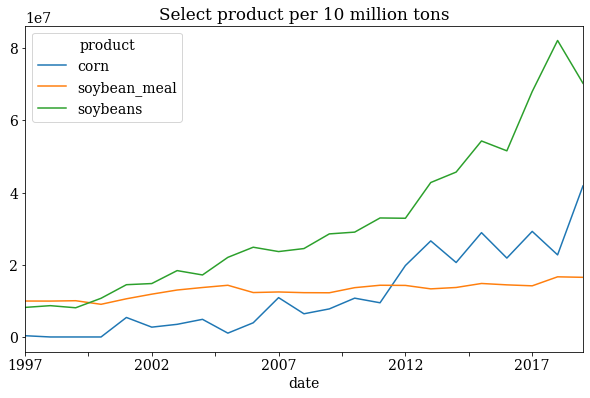

In [116]:
# basic plot: Select product per 10 million tons

df_tons.plot()

plt.title('Select product per 10 million tons')
plt.show()

In [117]:
# Descriptive statistics

df_tons.describe()

product,corn,soybean_meal,soybeans
count,2.300000e+01,2.300000e+01,2.300000e+01
mean,1.212709e+07,1.294884e+07,3.191125e+07
std,1.186351e+07,2.036009e+06,2.121482e+07
min,5.321076e+03,9.055435e+06,8.096035e+06
25%,3.118563e+06,1.205801e+07,1.599629e+07
50%,7.781248e+06,1.333354e+07,2.486963e+07
75%,2.124733e+07,1.430875e+07,4.424113e+07
max,4.183192e+07,1.666998e+07,8.214744e+07


### Autocorrelation analysis

#### `corn`

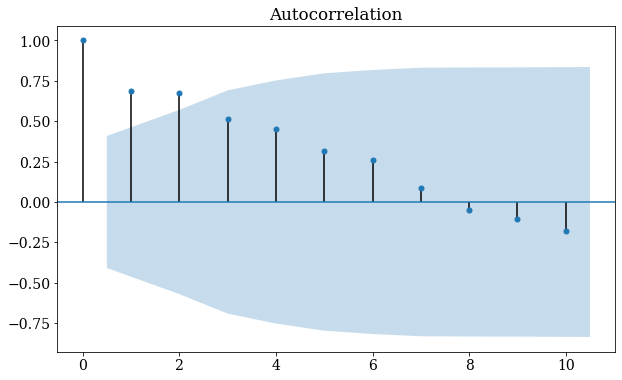

In [118]:
# Autocorrelation plot

plot_acf(df_tons.corn, lags=10)
plt.show()

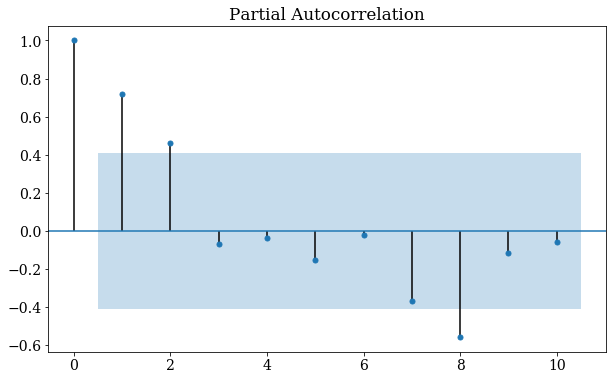

In [119]:
# Partial autocorrelation plot

plot_pacf(df_tons.corn, lags=10)
plt.show()

#### `soybean_meal`

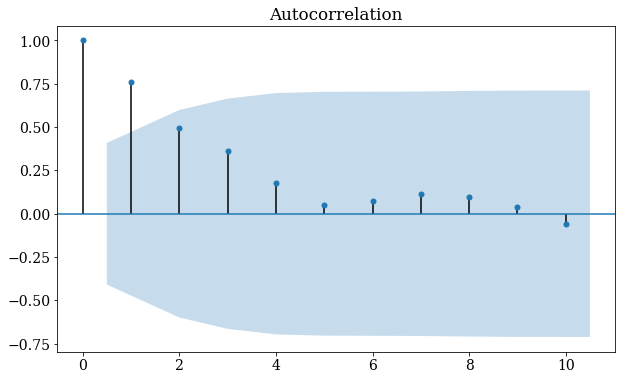

In [120]:
# Autocorrelation plot

plot_acf(df_tons.soybean_meal, lags=10)
plt.show()

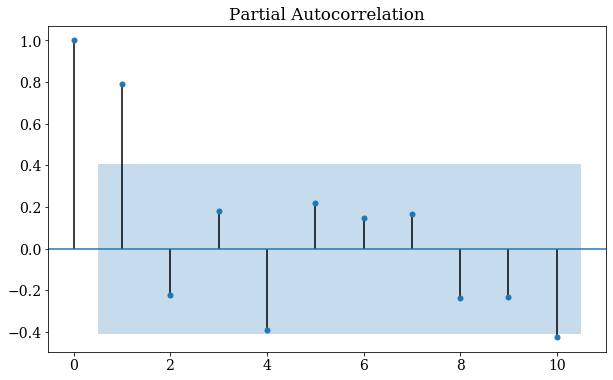

In [121]:
# Partial autocorrelation plot

plot_pacf(df_tons.soybean_meal, lags=10)
plt.show()

#### `soybeans`

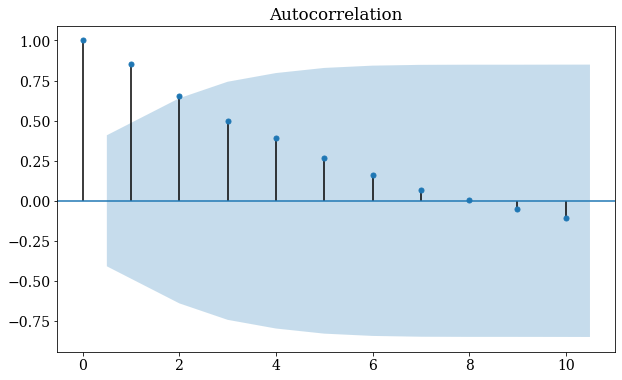

In [122]:
# Autocorrelation plot

plot_acf(df_tons.soybeans, lags=10)
plt.show()

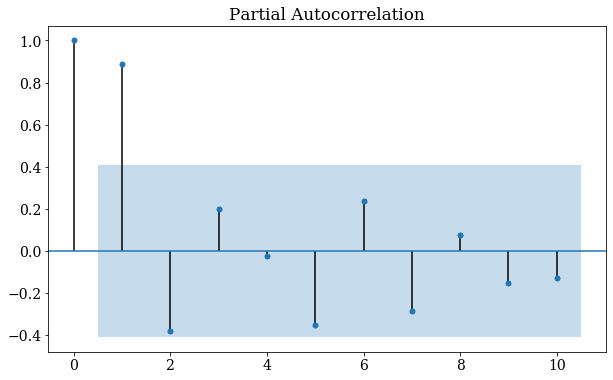

In [123]:
# Partial autocorrelation plot

plot_pacf(df_tons.soybeans, lags=10)
plt.show()

Comments:

> * The presence of significant autocorrelation and moving average processes was identified for all series.

### Split data

> * Separation of data is necessary to validate the models and choose the one with the least error.
> * The validation data will consist of 4 observations.

In [124]:
# Split data into train and validation set

df_tons_train = df_tons[:-4]
df_tons_validation = df_tons[-4:]

In [125]:
# Check train data tail

df_tons_train.tail()

product,corn,soybean_meal,soybeans
date,,,
2011,9.479281e+06,1.433487e+07,3.297554e+07
2012,1.979615e+07,1.428904e+07,3.289181e+07
2013,2.662047e+07,1.333354e+07,4.279507e+07
2014,2.063022e+07,1.371632e+07,4.568718e+07
2015,2.890038e+07,1.482660e+07,5.430348e+07


In [126]:
# Check validation data

df_tons_validation

product,corn,soybean_meal,soybeans
date,,,
2016,2.186444e+07,1.444379e+07,5.157381e+07
2017,2.925533e+07,1.417674e+07,6.800659e+07
2018,2.274727e+07,1.666998e+07,8.214744e+07
2019,4.183192e+07,1.653038e+07,7.030014e+07


### Unit root test

> * Here, we will apply only the PP test, with different specifications

#### `corn`

In [127]:
# PP test | trend: include constant 

pp = PhillipsPerron(df_tons_train.corn) 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  1.051
P-value                         0.995
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.86 (1%), -3.04 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [128]:
# PP test | trend: include constante and linear time trend

pp.trend = 'ct' 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.810
P-value                         0.700
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.57 (1%), -3.69 (5%), -3.29 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### `soybean_meal`

In [129]:
# PP test | trend: include constant 

pp = PhillipsPerron(df_tons_train.soybean_meal) 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.723
P-value                         0.841
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.86 (1%), -3.04 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [130]:
# PP test | trend: include constante and linear time trend

pp.trend = 'ct' 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.533
P-value                         0.818
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.57 (1%), -3.69 (5%), -3.29 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### `soybeans`

In [131]:
# PP test | trend: include constant 

pp = PhillipsPerron(df_tons_train.soybeans) 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  4.015
P-value                         1.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.86 (1%), -3.04 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [132]:
# PP test | trend: include constante and linear time trend

pp.trend = 'ct' 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                  0.406
P-value                         0.997
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.57 (1%), -3.69 (5%), -3.29 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Comments:

> * All results for selected series indicated the presence of a unit root, even considering different specifications. Results at 1% significance. 

### First difference

In [133]:
# Applying the first difference and removing the generated missing value

df_tons_diff = df_tons.diff()[1:]
df_tons_diff

product,corn,soybean_meal,soybeans
date,,,
1998,-3.508614e+05,-18070.115,4.844672e+05
1999,-7.125670e+02,102190.900,-5.834572e+05
2000,2.336800e+02,-994631.107,2.629089e+06
2001,5.404644e+06,1527058.366,3.761778e+06
2002,-2.682809e+06,1283738.356,3.195879e+05
2003,7.823454e+05,1147169.714,3.584627e+06
2004,1.382453e+06,694959.287,-1.205024e+06
2005,-3.822737e+06,620099.350,4.877313e+06
2006,2.866858e+06,-2014324.037,2.806219e+06


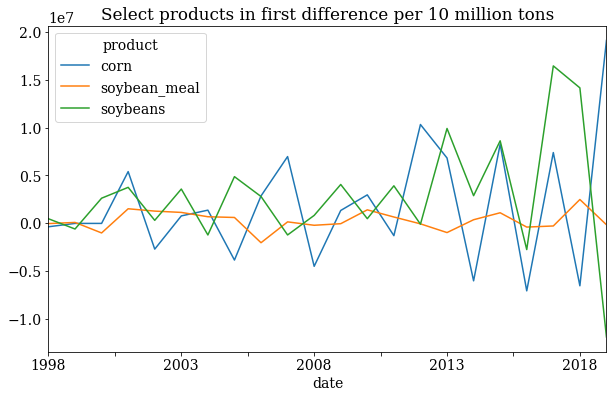

In [134]:
# Basic plot: Select products in first difference per 10 million tons

df_tons_diff.plot()

plt.title('Select products in first difference per 10 million tons')
plt.show()

#### New Split data

In [135]:
# Split data into train and test set | data in difference

df_tons_diff_train = df_tons_diff[:-4]
df_tons_diff_validation = df_tons_diff[-4:]

In [136]:
# Check train data tail

df_tons_diff_train.tail()

product,corn,soybean_meal,soybeans
date,,,
2011,-1.280034e+06,668770.681,3922108.453
2012,1.031687e+07,-45828.003,-83732.997
2013,6.824319e+06,-955496.965,9903267.364
2014,-5.990245e+06,382777.723,2892106.342
2015,8.270156e+06,1110273.774,8616302.967


In [137]:
# Check test data

df_tons_diff_validation

product,corn,soybean_meal,soybeans
date,,,
2016,-7.035936e+06,-382804.864,-2.729677e+06
2017,7.390889e+06,-267047.792,1.643279e+07
2018,-6.508062e+06,2493232.099,1.414084e+07
2019,1.908465e+07,-139595.057,-1.184729e+07


#### Unit root test | Data in first difference

In [138]:
# PP test for Corn data
# trend: include constante and linear time trend

pp = PhillipsPerron(df_tons_diff_train.corn, trend = 'ct') 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -9.409
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.62 (1%), -3.71 (5%), -3.30 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [139]:
# PP test for Soybean Meal data
# trend: include constante and linear time trend

pp = PhillipsPerron(df_tons_diff_train.soybean_meal, trend = 'ct') 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.436
P-value                         0.047
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.62 (1%), -3.71 (5%), -3.30 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [140]:
# PP test for Soybeans data
# trend: include constante and linear time trend

pp = PhillipsPerron(df_tons_diff_train.soybeans, trend = 'ct') 
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -5.938
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.62 (1%), -3.71 (5%), -3.30 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Comments:
    
> With the series in difference, the hypothesis of the presence of a unit root in all series at 5% significance can be rejected, accepting the hypothesis that the series have a stationary process.

### Modeling

> * The base model for each product will be arima, in the same way that it was modeled in the Case.

> * I will certainly have problems in modeling, due to the low variability of some variables added to the small sample.

#### ARIMA

In [141]:
# Corn model 
# Max_P = 3, Max_Q = 3

model_corn = pm.auto_arima(df_tons_train.corn, start_p=1, start_q=1,
                      test='pp',       
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=609.006, BIC=612.568, Time=0.109 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=606.106, BIC=607.887, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=605.823, BIC=608.495, Time=0.018 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=608.741, BIC=611.412, Time=0.029 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=606.293, BIC=607.184, Time=0.010 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=605.652, BIC=609.214, Time=0.038 seconds
Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=604.119, BIC=608.571, Time=0.077 seconds
Fit ARIMA(3,1,1)x(0,0,0,0) [intercept=True]; AIC=604.320, BIC=609.663, Time=0.105 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=605.256, BIC=609.708, Time=0.126 seconds
Total fit time: 0.546 seconds


In [142]:
# Summary results

print(model_corn.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -297.060
Date:                Wed, 08 Jul 2020   AIC                            604.119
Time:                        16:11:28   BIC                            608.571
Sample:                             0   HQIC                           604.733
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.158e+06   1.29e+06      1.672      0.094   -3.71e+05    4.69e+06
ar.L1         -0.3013      0.214     -1.407      0.160      -0.721       0.118
ar.L2         -0.3143      0.326     -0.965      0.3

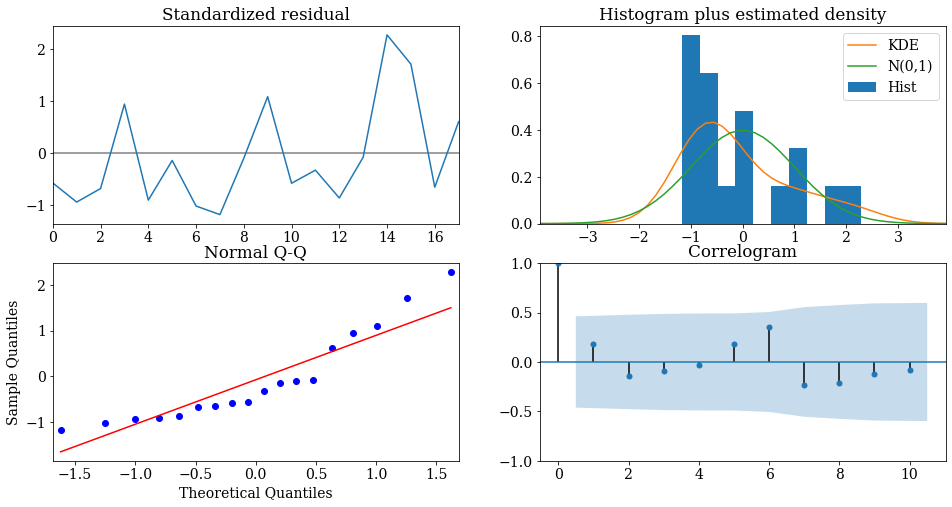

In [143]:
# Diagnostics model

model_corn.plot_diagnostics(figsize=(16, 8))
plt.show()

In [144]:
# Soybean Meal model 
# Max_P = 2, Max_Q = 2

model_soybean_meal = pm.auto_arima(df_tons_train.soybean_meal, start_p=1, start_q=1,
                      test='pp',       
                      max_p=2, max_q=2, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=528.977, BIC=532.310, Time=0.125 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=529.141, BIC=530.808, Time=0.013 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=530.624, BIC=533.124, Time=0.068 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=530.991, BIC=533.491, Time=0.083 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=527.299, BIC=528.133, Time=0.014 seconds
Total fit time: 0.327 seconds


In [145]:
# Summary results

print(model_soybean_meal.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -262.650
Date:                Wed, 08 Jul 2020   AIC                            527.299
Time:                        16:11:31   BIC                            528.133
Sample:                             0   HQIC                           527.382
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.368e+12   4.13e+11      3.315      0.001    5.59e+11    2.18e+12
Ljung-Box (Q):                       10.86   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.82   Pr

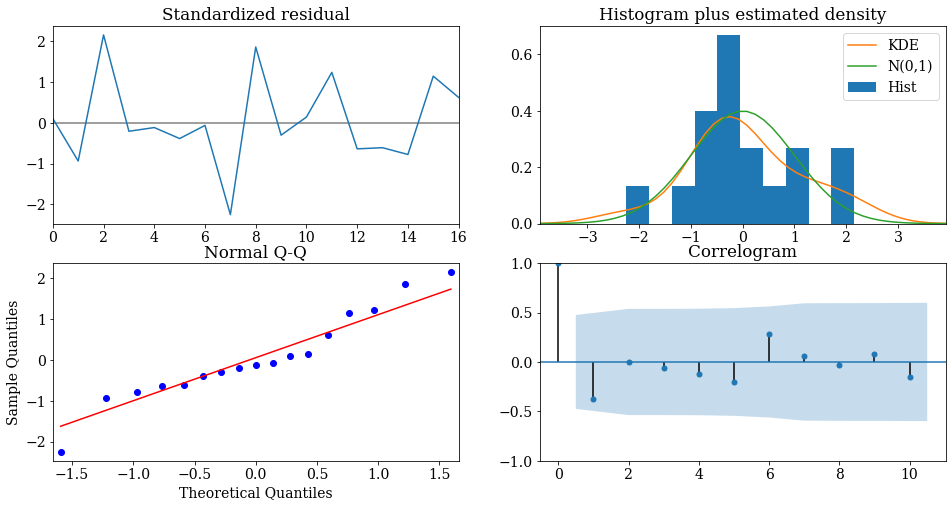

In [146]:
# Diagnostics model

model_soybean_meal.plot_diagnostics(figsize=(16, 8))
plt.show()

In [147]:
# Soybeans model 
# Max_P = 3, Max_Q = 2

model_soybeans = pm.auto_arima(df_tons_train.soybeans, start_p=1, start_q=1,
                      test='pp',       
                      max_p=10, max_q=10, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=593.865, BIC=597.427, Time=0.169 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=592.271, BIC=594.052, Time=0.014 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=592.932, BIC=595.604, Time=0.032 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=594.301, BIC=596.972, Time=0.060 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=600.037, BIC=600.927, Time=0.015 seconds
Total fit time: 0.315 seconds


In [148]:
# Summary results

print(model_soybeans.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -294.136
Date:                Wed, 08 Jul 2020   AIC                            592.271
Time:                        16:11:33   BIC                            594.052
Sample:                             0   HQIC                           592.517
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.562e+06    8.9e+05      2.879      0.004    8.18e+05    4.31e+06
sigma2      9.142e+12   3.58e+12      2.557      0.011    2.13e+12    1.61e+13
Ljung-Box (Q):                       18.33   Jarque-

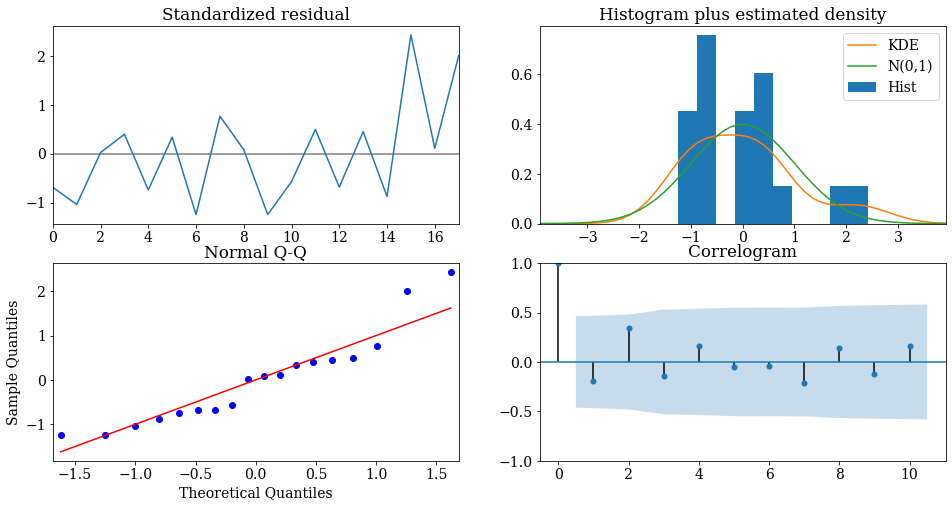

In [149]:
# Diagnostics model

model_soybeans.plot_diagnostics(figsize=(16, 8))
plt.show()

Comments: 
    
> Base models: 
   > * ARIMA(3,1,0).
   > * ARIMA(0,2,0). This model is a random walk. Thus, the variations are exclusively stochastic.
   > * ARIMA(0,1,0). This model is a random walk too. 

> * The residues of all models are not significantly correlated.

#### ARIMA forecast

In [150]:
# Set forecast horizon and index for visualization

n_periods = 4

index_of_all = df_tons.index
index_of_fc = df_tons_validation.index

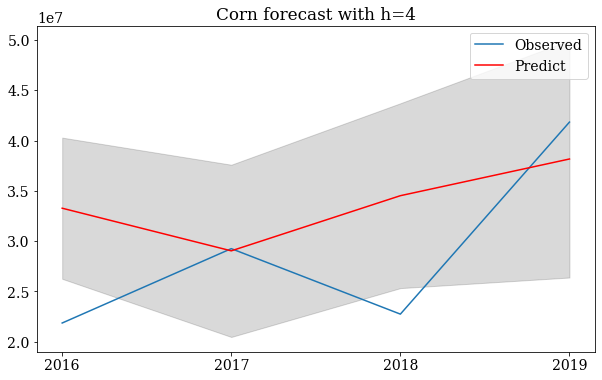

In [151]:
# Forecast - Corn model - ARIMA(3,1,0)

# Forecast and confidence interval
fc_arima_corn, confint_arima_corn = model_corn.predict(n_periods=n_periods, return_conf_int=True) 

# Prepare for visualization
fc_arima_corn = pd.Series(fc_arima_corn, index=index_of_fc)
lower_series_corn = pd.Series(confint_arima_corn[:, 0], index=index_of_fc)
upper_series_corn = pd.Series(confint_arima_corn[:, 1], index=index_of_fc)


# Plot: Forecast and confidence interval
plt.plot(df_tons_validation.corn)
plt.plot(fc_arima_corn, color='red')
plt.legend(['Observed','Predict'])
plt.fill_between(lower_series_corn.index, 
                 lower_series_corn, 
                 upper_series_corn, 
                 color='k', alpha=.15)

plt.title("Corn forecast with h=4")
plt.show()

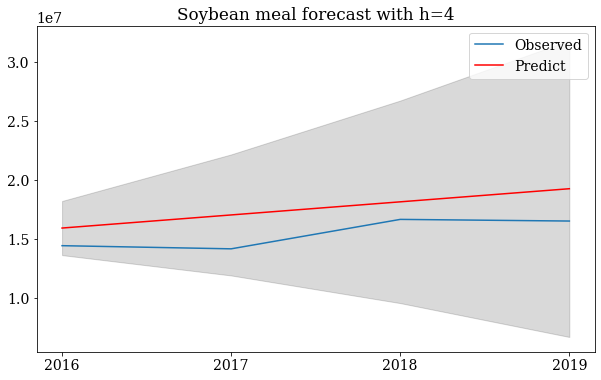

In [152]:
# Forecast - Soybean meal model - ARIMA(0,2,0)

# Forecast and confidence interval
fc_arima_soybean_meal, confint_arima_soybean_meal = model_soybean_meal.predict(n_periods=n_periods, return_conf_int=True) 

# Prepare for visualization
fc_arima_soybean_meal = pd.Series(fc_arima_soybean_meal, index=index_of_fc)
lower_series_soybean_meal = pd.Series(confint_arima_soybean_meal[:, 0], index=index_of_fc)
upper_series_soybean_meal = pd.Series(confint_arima_soybean_meal[:, 1], index=index_of_fc)


# Plot: Forecast and confidence interval
plt.plot(df_tons_validation.soybean_meal)
plt.plot(fc_arima_soybean_meal, color='red')
plt.legend(['Observed','Predict'])
plt.fill_between(lower_series_soybean_meal.index, 
                 lower_series_soybean_meal, 
                 upper_series_soybean_meal, 
                 color='k', alpha=.15)

plt.title("Soybean meal forecast with h=4")
plt.show()

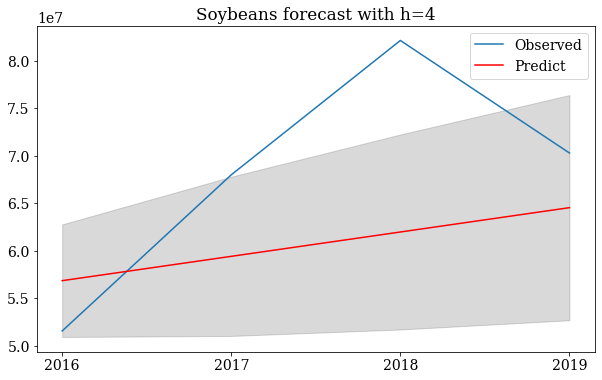

In [153]:
# Forecast - Soybeans model - ARIMA(0,1,0)

# Forecast and confidence interval
fc_arima_soybeans, confint_arima_soybeans = model_soybeans.predict(n_periods=n_periods, return_conf_int=True) 

# Prepare for visualization
fc_arima_soybeans = pd.Series(fc_arima_soybeans, index=index_of_fc)
lower_series_soybeans = pd.Series(confint_arima_soybeans[:, 0], index=index_of_fc)
upper_series_soybeans = pd.Series(confint_arima_soybeans[:, 1], index=index_of_fc)


# Plot: Forecast and confidence interval
plt.plot(df_tons_validation.soybeans)
plt.plot(fc_arima_soybeans, color='red')
plt.legend(['Observed','Predict'])
plt.fill_between(lower_series_soybeans.index, 
                 lower_series_soybeans, 
                 upper_series_soybeans, 
                 color='k', alpha=.15)

plt.title("Soybeans forecast with h=4")
plt.show()

Comments:
    
>

### Multivariate modeling

> * The first multivariate modeling will be done arbitrarily, selecting the dependent variables directly.

#### Data preparation

In [154]:
# Head check

df_covar.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


In [155]:
# Tail check

df_covar.tail()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
47,2026,145.203519,150.142281,167.410250,5126.923701,208.285085,235.511277,255.045373,852.031753,477.054784,739.037617,215.382241,1691.310433
48,2027,150.660041,154.391956,171.480405,5362.762191,215.582431,239.985991,259.891235,881.883004,493.768577,764.930077,216.889916,1769.110713
49,2028,156.116564,158.641630,175.550560,5604.086489,223.147862,244.665718,264.959114,912.830910,511.096390,791.773755,218.408146,1848.720695
50,2029,161.573086,162.891304,179.620715,5850.666295,230.993806,249.436700,270.125817,944.926309,529.066687,819.612750,219.937003,1930.064405
51,2030,167.029608,167.140979,183.690870,6102.244946,239.096864,254.300715,275.393270,978.073487,547.625878,848.364039,221.476562,2013.057175


In [156]:
# Compatibilizing to concatenate later

df_covar_temp = df_covar.copy() #copy
df_covar_temp['year'] = df_covar_temp['year'].astype(int) #change type to int
df_covar_temp['year'] = df_covar_temp['year'].astype(str) #change type to string
df_covar_temp.index = df_covar_temp['year']  #change index, put year
df_covar_temp = df_covar_temp.drop(columns=['year']) #drop year column

In [157]:
# Split data into train, validation and test set

df_cor_train = df_covar_temp[18:37] #1997 to 2015
df_cor_validation = df_covar_temp[37:41] #2016 to 2019
df_cor_test = df_covar_temp[41:] #2020 to 2030

In [158]:
# Concatenate data frames

df_train = pd.concat([df_tons_train, df_cor_train], axis=1)
df_validation = pd.concat([df_tons_validation, df_cor_validation], axis=1)
df_test = df_cor_test

In [159]:
# Head data check

df_train.head()

,corn,soybean_meal,soybeans,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
1997,356895.029,9.965945e+06,8.195025e+06,105.761629,93.204180,124.012650,560.722750,106.976296,152.738204,156.728085,345.124057,173.936618,218.683678,180.133771,299.095195
1998,6033.643,9.947875e+06,8.679492e+06,84.160030,80.831375,77.421718,604.459124,109.008846,159.916900,163.780849,318.894628,178.458970,235.084954,178.152299,316.442716
1999,5321.076,1.005007e+07,8.096035e+06,65.928699,71.823936,67.601747,651.002477,109.335873,167.912745,171.478549,333.563781,184.883493,249.425136,177.617842,331.631967
2000,5554.756,9.055435e+06,1.072512e+07,68.993825,70.173520,82.934920,706.337687,116.880048,174.965080,180.223955,348.574151,193.757900,262.894093,182.591142,354.182940
2001,5410198.846,1.058249e+07,1.448690e+07,63.605148,71.279115,80.029143,765.670053,117.815088,178.989277,187.252689,360.425672,198.601848,272.095387,183.321506,378.621563


In [160]:
# Data check

df_validation

,corn,soybean_meal,soybeans,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
2016,2.186444e+07,1.444379e+07,5.157381e+07,136.707475,126.651480,155.159310,3009.387480,199.457893,212.492144,228.481190,651.871186,353.074433,512.214274,205.547136,986.279640
2017,2.925533e+07,1.417674e+07,6.800659e+07,135.244081,122.971792,154.470762,3217.035216,206.837835,218.654416,235.107145,678.597904,366.844336,533.215059,210.069173,1054.332935
2018,2.274727e+07,1.666998e+07,8.214744e+07,129.101989,130.859269,165.414699,3432.576576,195.668592,224.339431,240.749716,707.099016,380.050732,561.475457,210.699381,1129.190573
2019,4.183192e+07,1.653038e+07,7.030014e+07,123.250034,135.360386,148.243872,3641.963747,180.797779,228.377541,245.564711,724.069393,391.072203,592.918083,212.174276,1208.233913


In [161]:
# Head data check

df_test.head()

,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
year,,,,,,,,,,,,
2020,116.920726,127.345508,145.243944,3685.667312,169.949912,211.249225,225.919534,675.556744,379.328745,604.776444,201.141214,1240.856229
2021,121.166259,130.855976,148.695213,4024.748705,175.218360,217.586702,235.634074,716.765705,401.318974,621.710185,207.175450,1327.716165
2022,125.565952,134.463215,152.228491,4230.010888,181.266859,220.415329,238.697317,741.508301,415.172417,643.171485,208.832854,1395.429689
2023,130.125404,138.169893,155.845726,4441.511433,187.576609,223.721559,242.277776,767.319592,429.624226,665.559753,210.503517,1465.201174
2024,134.850415,141.978752,159.548913,4663.587005,194.212029,227.301104,246.154221,794.463105,444.821949,689.103567,212.187545,1538.461232


#### Best partners 

> * Inspired by 'Gravity with Gravitas: A Solution to the Border Puzzle' by Anderson and Wincop (2003), I will use the best partners as predictors.


Source paper: https://www.aeaweb.org/articles?id=10.1257/000282803321455214

In [162]:
# Select and group data

# Filter by product
df_temp6 = df_comex[ df_comex['product'].isin(['corn','soybean_meal','soybeans']) ]  

# Change data format
df_temp6.date = pd.to_datetime(df_temp6.date).dt.strftime('%Y')

# Group by
df_temp6 = df_temp6.groupby(['date','product','type','country'])[['usd']].sum()

# Reset index
df_temp6.reset_index(inplace=True)

In [163]:
# Corn


# Select product
df_temp6_corn = df_temp6[ df_temp6['product'].isin(['corn']) ]

# Group by
df_temp6_corn = df_temp6_corn.groupby(['type','country'])[['usd']].sum()

# Reset index
df_temp6_corn.reset_index(inplace=True)

# Pivot Table
df_temp6_corn = df_temp6_corn.pivot(index='country', columns='type', values='usd')

# Imput data
df_temp6_corn = df_temp6_corn.fillna(0)

# Create feature 'Total_trade'
df_temp6_corn['Total_trade'] =  df_temp6_corn['Export'] + df_temp6_corn['Import']

# Reset index
df_temp6_corn.reset_index(inplace=True)

# Top 10 historical partners
df_temp6_corn.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
57,Iran,8.694450e+09,0.000000e+00,8.694450e+09
64,Japan,4.945267e+09,0.000000e+00,4.945267e+09
111,South Korea,4.553239e+09,0.000000e+00,4.553239e+09
132,Vietnam,3.819931e+09,0.000000e+00,3.819931e+09
118,Taiwan,3.418874e+09,0.000000e+00,3.418874e+09
38,Egypt,3.294368e+09,0.000000e+00,3.294368e+09
112,Spain,3.220829e+09,1.063500e+04,3.220839e+09
72,Malaysia,2.417669e+09,0.000000e+00,2.417669e+09
96,Paraguay,4.018169e+08,1.879839e+09,2.281655e+09
105,Saudi Arabia,1.607009e+09,0.000000e+00,1.607009e+09


In [164]:
# Soybean Meal


# Select product
df_temp6_soybean_meal = df_temp6[ df_temp6['product'].isin(['soybean_meal']) ]

# Group by
df_temp6_soybean_meal = df_temp6_soybean_meal.groupby(['type','country'])[['usd']].sum()

# Reset index
df_temp6_soybean_meal.reset_index(inplace=True)

# Pivot Table
df_temp6_soybean_meal = df_temp6_soybean_meal.pivot(index='country', columns='type', values='usd')

# Imput data
df_temp6_soybean_meal = df_temp6_soybean_meal.fillna(0)

# Create feature 'Total_trade'
df_temp6_soybean_meal['Total_trade'] =  df_temp6_soybean_meal['Export'] + df_temp6_soybean_meal['Import']

# Reset index
df_temp6_soybean_meal.reset_index(inplace=True)

# Top 10 historical partners
df_temp6_soybean_meal.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
75,Netherlands,2.322441e+10,0.0,2.322441e+10
38,France,1.346868e+10,0.0,1.346868e+10
41,Germany,8.482795e+09,25230.0,8.482820e+09
109,Thailand,7.809265e+09,0.0,7.809265e+09
100,South Korea,5.957297e+09,7250.0,5.957305e+09
54,Indonesia,5.520220e+09,0.0,5.520220e+09
101,Spain,3.171328e+09,1225725.0,3.172553e+09
98,Slovenia,3.067915e+09,0.0,3.067915e+09
55,Iran,2.771266e+09,0.0,2.771266e+09
58,Italy,2.476368e+09,0.0,2.476368e+09


In [165]:
# Soybeans


# Select product
df_temp6_soybeans = df_temp6[ df_temp6['product'].isin(['soybeans']) ]

# Group by
df_temp6_soybeans = df_temp6_soybeans.groupby(['type','country'])[['usd']].sum()

# Reset index
df_temp6_soybeans.reset_index(inplace=True)

# Pivot Table
df_temp6_soybeans = df_temp6_soybeans.pivot(index='country', columns='type', values='usd')

# Imput data
df_temp6_soybeans = df_temp6_soybeans.fillna(0)

# Create feature 'Total_trade'
df_temp6_soybeans['Total_trade'] =  df_temp6_soybeans['Export'] + df_temp6_soybeans['Import']

# Reset index
df_temp6_soybeans.reset_index(inplace=True)

# Top 10 historical partners
df_temp6_soybeans.nlargest(10, 'Total_trade')

type,country,Export,Import,Total_trade
18,China,1.839475e+11,443.0,1.839475e+11
63,Netherlands,1.686637e+10,0.0,1.686637e+10
86,Spain,1.447894e+10,0.0,1.447894e+10
94,Thailand,7.510417e+09,2419.0,7.510420e+09
35,Germany,5.501429e+09,0.0,5.501429e+09
93,Taiwan,4.769825e+09,515.0,4.769826e+09
49,Japan,3.898403e+09,10221.0,3.898413e+09
48,Italy,3.871871e+09,0.0,3.871871e+09
101,United Kingdom,3.544115e+09,0.0,3.544115e+09
45,Iran,3.498658e+09,0.0,3.498658e+09


#### Ad hoc model especification base on price and best partners

> Among the additional covariates, the top 5 partners per product will be used to compose the model specification.


> Model specifications:
    > * Cor: $Corn_t = PriceCorn_t + GdpIran_t + GdpJapan_t + GdpVietnam_t + e_t$
    > * Soybean Meal: $SoybeanMeal_t = PriceSoybeanMeal_t + GdpNetherlands_t + GdpThailand_t + e_t$
    > * Soybeans: $Soybeans_t = PriceSoybeans_t + GdpChina_t + GdpNetherlands_t + GdpSpain_t + GdpThailand_t + e_t$


In [166]:
# Select interest variable and features

corn_features = ['price_corn','gdp_iran','gdp_japan','gdp_vietnam']
soybean_meal_features = ['price_soybean_meal','gpd_netherlands','gdp_thailand']
soybeans_features = ['price_soybeans','gdp_china','gpd_netherlands','gdp_spain','gdp_thailand']

interest_corn = ['corn']
interest_soybean_meal = ['soybean_meal']
interest_soybeans = ['soybeans']

In [167]:
# Corn

ols_model_corn = sm.OLS(df_train[interest_corn], df_train[corn_features])
ols_result_corn = ols_model_corn.fit()
print(ols_result_corn.summary())

                                 OLS Regression Results                                
Dep. Variable:                   corn   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              95.69
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    1.73e-10
Time:                        16:11:40   Log-Likelihood:                         -306.01
No. Observations:                  19   AIC:                                      620.0
Df Residuals:                      15   BIC:                                      623.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

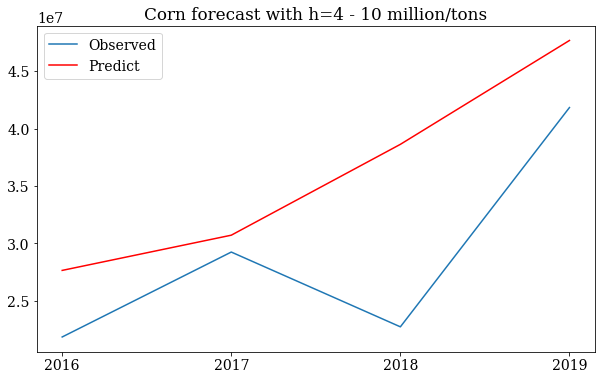

In [168]:
# Forecast - Corn 

ols_fc_corn = ols_result_corn.predict(df_validation[corn_features])

plt.plot(df_validation[interest_corn])
plt.plot(ols_fc_corn, color='red')
plt.legend(['Observed','Predict'])

plt.title("Corn forecast with h=4 - 10 million/tons")
plt.show()

In [169]:
# Soybean Meal 

ols_model_soybean_meal = sm.OLS(df_train[interest_soybean_meal], df_train[soybean_meal_features])
ols_result_soybean_meal = ols_model_soybean_meal.fit()
print(ols_result_soybean_meal.summary())

                                 OLS Regression Results                                
Dep. Variable:           soybean_meal   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              951.0
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    3.12e-18
Time:                        16:11:40   Log-Likelihood:                         -288.20
No. Observations:                  19   AIC:                                      582.4
Df Residuals:                      16   BIC:                                      585.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

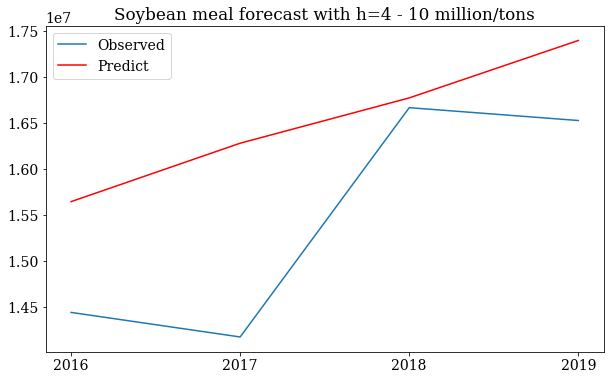

In [170]:
# Forecast - soybeans meal

ols_fc_soybean_meal = ols_result_soybean_meal.predict(df_validation[soybean_meal_features])

plt.plot(df_validation[interest_soybean_meal])
plt.plot(ols_fc_soybean_meal, color='red')
plt.legend(['Observed','Predict'])

plt.title("Soybean meal forecast with h=4 - 10 million/tons")
plt.show()

In [171]:
# Soybeans

ols_model_soybeans= sm.OLS(df_train[interest_soybeans], df_train[soybeans_features])
ols_result_soybeans = ols_model_soybeans.fit()
print(ols_result_soybeans.summary())

                                 OLS Regression Results                                
Dep. Variable:               soybeans   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              761.1
Date:                Wed, 08 Jul 2020   Prob (F-statistic):                    1.57e-16
Time:                        16:11:41   Log-Likelihood:                         -299.13
No. Observations:                  19   AIC:                                      608.3
Df Residuals:                      14   BIC:                                      613.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

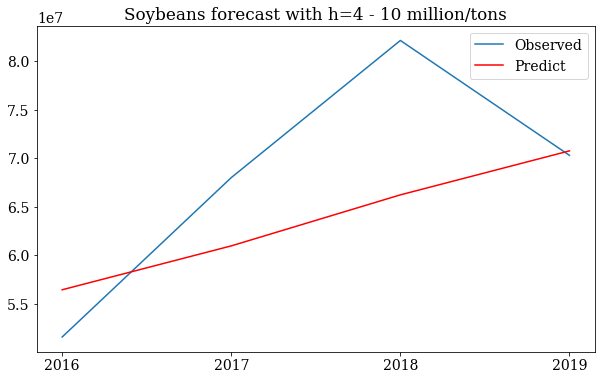

In [172]:
# Forecast - Soybeans 

ols_fc_soybeans = ols_result_soybeans.predict(df_validation[soybeans_features])

plt.plot(df_validation[interest_soybeans])
plt.plot(ols_fc_soybeans, color='red')
plt.legend(['Observed','Predict'])

plt.title("Soybeans forecast with h=4 - 10 million/tons")
plt.show()

Comments:
    
> * The adjustment ($R^2$ and $R^2 adjusted$) observed in the models was greater than 95%.
> * The dependent variables selected showed significant predominance among product models.

### Forecast Accuracy

> * Again, we will use MSPE and MAPE.

In [173]:
# Join arima forecast data

fc_arima_c2 = pd.DataFrame()

fc_arima_c2['corn'] = fc_arima_corn
fc_arima_c2['soybean_meal'] = fc_arima_soybean_meal
fc_arima_c2['soybeans'] = fc_arima_soybeans
fc_arima_c2

,corn,soybean_meal,soybeans
date,,,
2016,3.327281e+07,1.593687e+07,5.686506e+07
2017,2.903587e+07,1.704714e+07,5.942665e+07
2018,3.451777e+07,1.815742e+07,6.198823e+07
2019,3.816481e+07,1.926769e+07,6.454981e+07


In [174]:
# Join ols forecast data

fc_ols = pd.DataFrame()

fc_ols['corn'] = ols_fc_corn
fc_ols['soybean_meal'] = ols_fc_soybean_meal
fc_ols['soybeans'] = ols_fc_soybeans
fc_ols

,corn,soybean_meal,soybeans
2016,2.765818e+07,1.564825e+07,5.644170e+07
2017,3.072258e+07,1.628354e+07,6.096663e+07
2018,3.863020e+07,1.677623e+07,6.622750e+07
2019,4.766981e+07,1.740066e+07,7.076340e+07


In [175]:
# Forecast accuracy - ARIMA

fc_acc_arima_c2 = forecast_accuracy(fc_arima_c2, df_validation[['corn','soybean_meal','soybeans']], 
                                    ['Corn_ARIMA','Soybean_meal_ARIMA','Soybeans_ARIMA'])
fc_acc_arima_c2

,Corn_ARIMA,Soybean_meal_ARIMA,Soybeans_ARIMA
MSPE,7.05479e+13,5.04346e+12,1.35268e+14
MAPE,6.76636e+06,2.14706e+06,9.94519e+06


In [176]:
# Forecast accuracy - OLS

fc_acc_ols = forecast_accuracy(fc_ols, df_validation[['corn','soybean_meal','soybeans']], 
                               ['Corn_OLS','Soybean_meal_OLS','Soybeans_OLS'])
fc_acc_ols

,Corn_OLS,Soybean_meal_OLS,Soybeans_OLS
MSPE,8.05172e+13,1.6645e+12,8.17291e+13
MAPE,7.24545e+06,1.07195e+06,7.07276e+06


Comments:

> * Based on the accuracy results, we can select a model from the 2 modeled by product.

### Best models

> Based on the previous session results, the best models tested by product are:
    > * Corn: ARIMA(3,1,0);
    > * Soybean Meal : OLS (Price + Best Partners);
    > * Soybeans : OLS (Price + Best Partners).

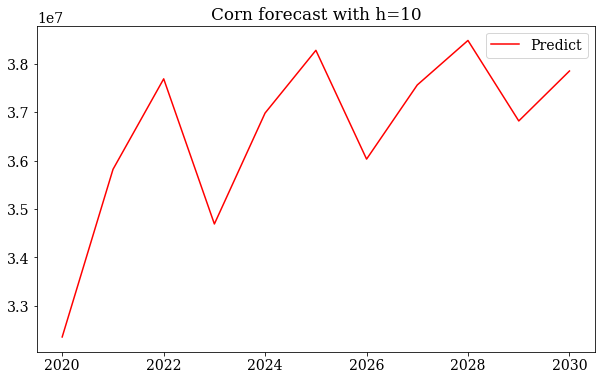

In [177]:
# Forecast - Corn model 

model_corn = sm.tsa.arima.ARIMA(df_train[interest_corn], order=(3, 1, 0))
model_corn = model_corn.fit()


start_index = '2020'
end_index = '2030'
arima_fc_corn = model_corn.predict(start=start_index, end=end_index)

plt.plot(arima_fc_corn, color='red')
plt.legend(['Predict'])

plt.title("Corn forecast with h=10")
plt.show()

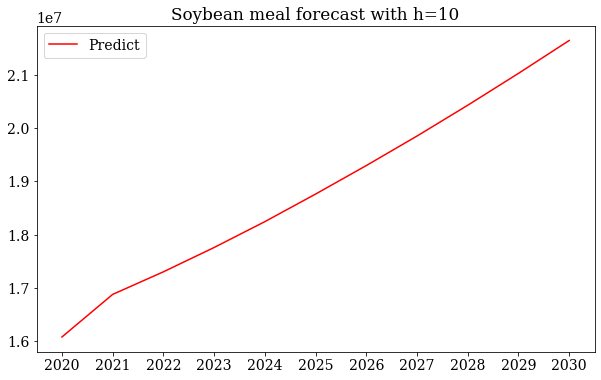

In [178]:
# Forecast - soybeans meal model

ols_fc_soybean_meal = ols_result_soybean_meal.predict(df_test[soybean_meal_features])


plt.plot(ols_fc_soybean_meal, color='red')
plt.legend(['Predict'])

plt.title("Soybean meal forecast with h=10")
plt.show()

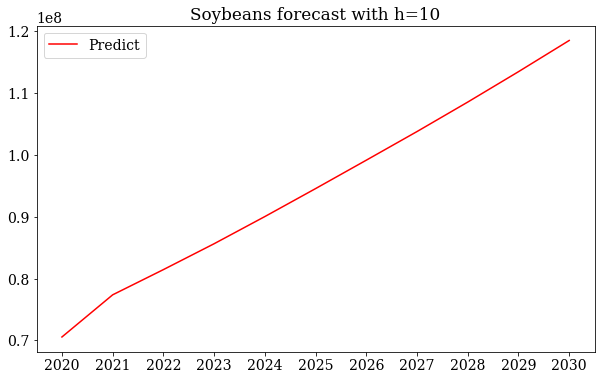

In [179]:
# Forecast - Soybeans model

ols_fc_soybeans = ols_result_soybeans.predict(df_test[soybeans_features])


plt.plot(ols_fc_soybeans, color='red')
plt.legend(['Predict'])

plt.title("Soybeans forecast with h=10")
plt.show()

Comments:
    
> * All forecasts demonstrate an increase in `Corn`, `Soybean Meal`, `Soybeans` exports (in tons) over time. Thus, it is observed the indicative of maintaining the trend of growth in the export of these products until 2030.

# End of test